In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [139]:
df = pd.read_csv("../data/EURUSD_with_signals.csv", parse_dates=["datetime"])

In [140]:
indicators = [
    "rsi", "macd", "macd_diff", "macd_signal",
    "ema_10", "ema_50", "ema_100", "ema_200",
    "atr", "adx", "stoch_k", "stoch_d", "bb_upper",
    "bb_lower", "bb_mid", "bb_bandwidth", "<TICKVOL>"
]

In [141]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[indicators] = scaler.fit_transform(df_scaled[indicators])

In [142]:
grouped_means = df_scaled.groupby("signal").mean()
grouped_standar_error_of_the_means = df_scaled.groupby("signal").sem()
print(grouped_means)

                               datetime    <OPEN>    <HIGH>     <LOW>  \
signal                                                                  
Buy       2024-09-22 07:15:36.000000256  1.082392  1.083515  1.080667   
Buy_Hold  2024-10-09 12:40:12.644889344  1.085102  1.086938  1.084168   
Hold      2025-06-25 14:00:00.000000000  1.160130  1.160430  1.159015   
Sell      2024-09-22 07:24:10.746268672  1.085847  1.087808  1.084989   
Sell_Hold 2024-09-17 11:33:40.062695936  1.085594  1.086574  1.083826   

            <CLOSE>  <TICKVOL>     ema_5    ema_10    ema_20    ema_50  ...  \
signal                                                                  ...   
Buy        1.081739  -0.125781  1.082957 -0.056617  1.083597 -0.044128  ...   
Buy_Hold   1.085971   0.010316  1.085169 -0.004600  1.084801 -0.005203  ...   
Hold       1.159320  -1.016334  1.160292  2.544939  1.157356  2.463589  ...   
Sell       1.086896  -0.169288  1.085511 -0.006062  1.084407 -0.029531  ...   
Sell_Hold  1.0

In [143]:
grouped_standar_error_of_the_means.describe()

,datetime,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,ema_5,ema_10,ema_20,ema_50,...,bb_upper,bb_lower,bb_mid,bb_bandwidth,stoch_k,stoch_d,atr,adx,adx_pos,adx_neg
count,5,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,6 days 12:40:19.283027319,0.001367,0.001379,0.001194,0.001204,0.152740,0.001230,0.040692,0.001200,0.041848,...,0.041801,0.042166,0.042021,0.040862,0.037757,0.052828,0.059247,0.041407,0.330949,0.334055
std,4 days 18:00:54.501947907,0.000612,0.000600,0.000854,0.000843,0.231881,0.000791,0.028842,0.000812,0.028089,...,0.027634,0.026788,0.027231,0.024465,0.022329,0.018932,0.026833,0.028338,0.176008,0.200043
min,0 days 02:00:00,0.000850,0.000900,0.000005,0.000040,0.030240,0.000186,0.000616,0.000100,0.004024,...,0.004945,0.007201,0.006119,0.008046,0.007352,0.032021,0.032390,0.003120,0.138456,0.087818
25%,5 days 00:10:03.359685141,0.000927,0.000932,0.000925,0.000928,0.035001,0.000928,0.031692,0.000919,0.031833,...,0.032228,0.031211,0.031672,0.031780,0.030913,0.032186,0.032931,0.030878,0.241223,0.241144
50%,5 days 01:52:46.370704990,0.000988,0.000995,0.000987,0.000992,0.061049,0.000984,0.033425,0.000971,0.033820,...,0.032976,0.034026,0.033536,0.034346,0.030962,0.065962,0.066863,0.034000,0.245332,0.264320
75%,11 days 05:15:52.288391867,0.002017,0.002016,0.002011,0.002014,0.071006,0.002006,0.068397,0.001993,0.069446,...,0.068985,0.068882,0.069055,0.061895,0.057928,0.066208,0.068414,0.069350,0.471113,0.504241
max,11 days 06:02:54.396354598,0.002054,0.002054,0.002043,0.002045,0.566404,0.002043,0.069330,0.002015,0.070114,...,0.069869,0.069513,0.069721,0.068245,0.061630,0.067763,0.095638,0.069687,0.558620,0.572753


In [144]:
grouped_means.describe()

,datetime,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,ema_5,ema_10,ema_20,ema_50,...,bb_upper,bb_lower,bb_mid,bb_bandwidth,stoch_k,stoch_d,atr,adx,adx_pos,adx_neg
count,5,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2024-11-19 00:58:43.890770688,1.099813,1.101053,1.098533,1.099749,-0.249470,1.099878,0.498021,1.099092,0.480007,...,0.500904,0.450705,0.480265,0.183157,0.166738,0.213265,0.105884,-0.042610,21.984391,20.214106
min,2024-09-17 11:33:40.062695936,1.082392,1.083515,1.080667,1.081739,-1.016334,1.082957,-0.056617,1.083597,-0.044128,...,-0.039506,-0.037490,-0.038851,-0.011736,-0.606698,-0.427649,-0.055877,-0.291715,18.660828,15.637073
25%,2024-09-22 07:15:36.000000256,1.085102,1.086574,1.083826,1.084819,-0.169288,1.085169,-0.006062,1.084407,-0.029531,...,-0.023382,-0.024469,-0.024136,-0.008225,-0.278639,-0.100974,-0.013674,-0.064607,20.225982,18.824301
50%,2024-09-22 07:24:10.746268672,1.085594,1.086938,1.084168,1.085971,-0.125781,1.085459,-0.004600,1.084801,-0.005203,...,-0.002077,-0.004070,-0.003094,0.003284,0.271947,0.096368,-0.002150,0.043844,22.158581,20.524000
75%,2024-10-09 12:40:12.644889344,1.085847,1.087808,1.084989,1.086896,0.010316,1.085511,0.012446,1.085301,0.015308,...,0.009890,0.012217,0.011144,0.010849,0.622996,0.436192,0.058553,0.048925,24.222738,21.880792
max,2025-06-25 14:00:00,1.160130,1.160430,1.159015,1.159320,0.053737,1.160292,2.544939,1.157356,2.463589,...,2.559593,2.307338,2.456262,0.921614,0.824082,1.062386,0.542569,0.050502,24.653827,24.204363
std,NaN,0.033746,0.033232,0.033850,0.033358,0.438529,0.033789,1.144553,0.032576,1.109090,...,1.151000,1.038064,1.104782,0.412908,0.601645,0.568745,0.247521,0.147530,2.564396,3.227879


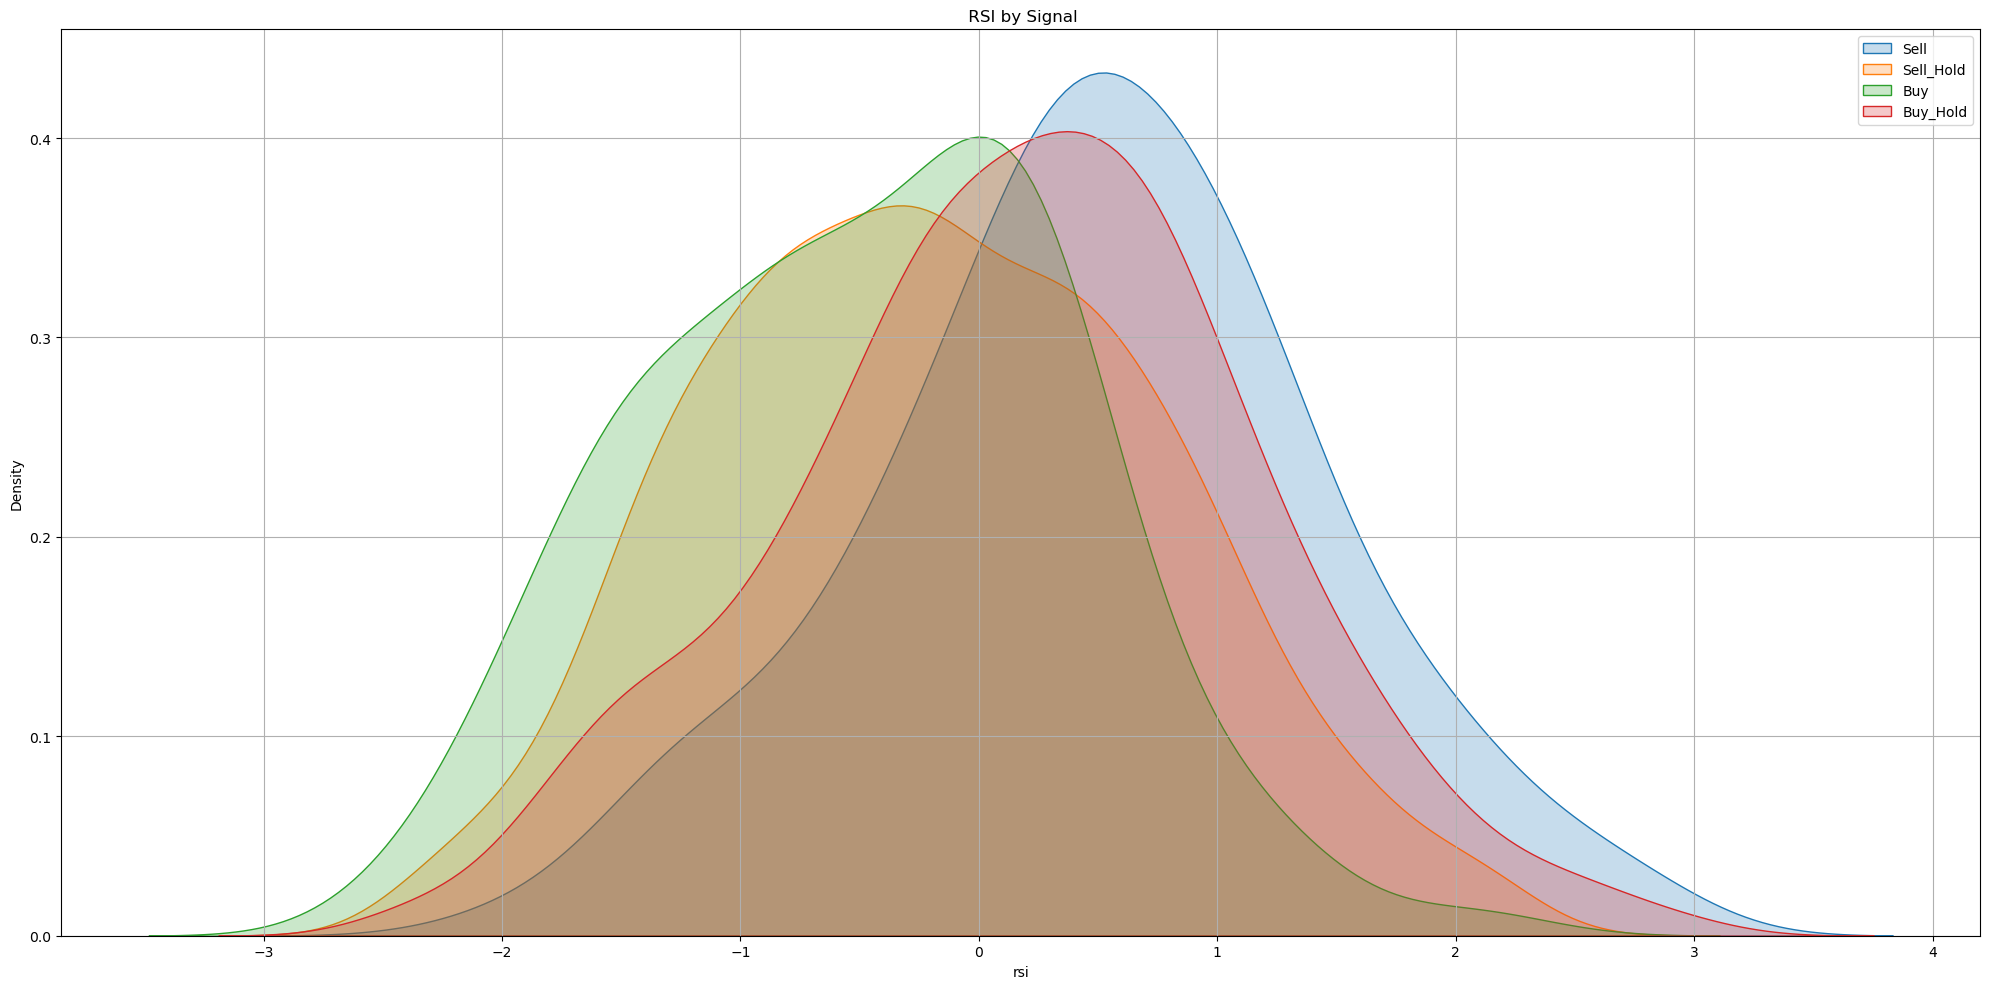

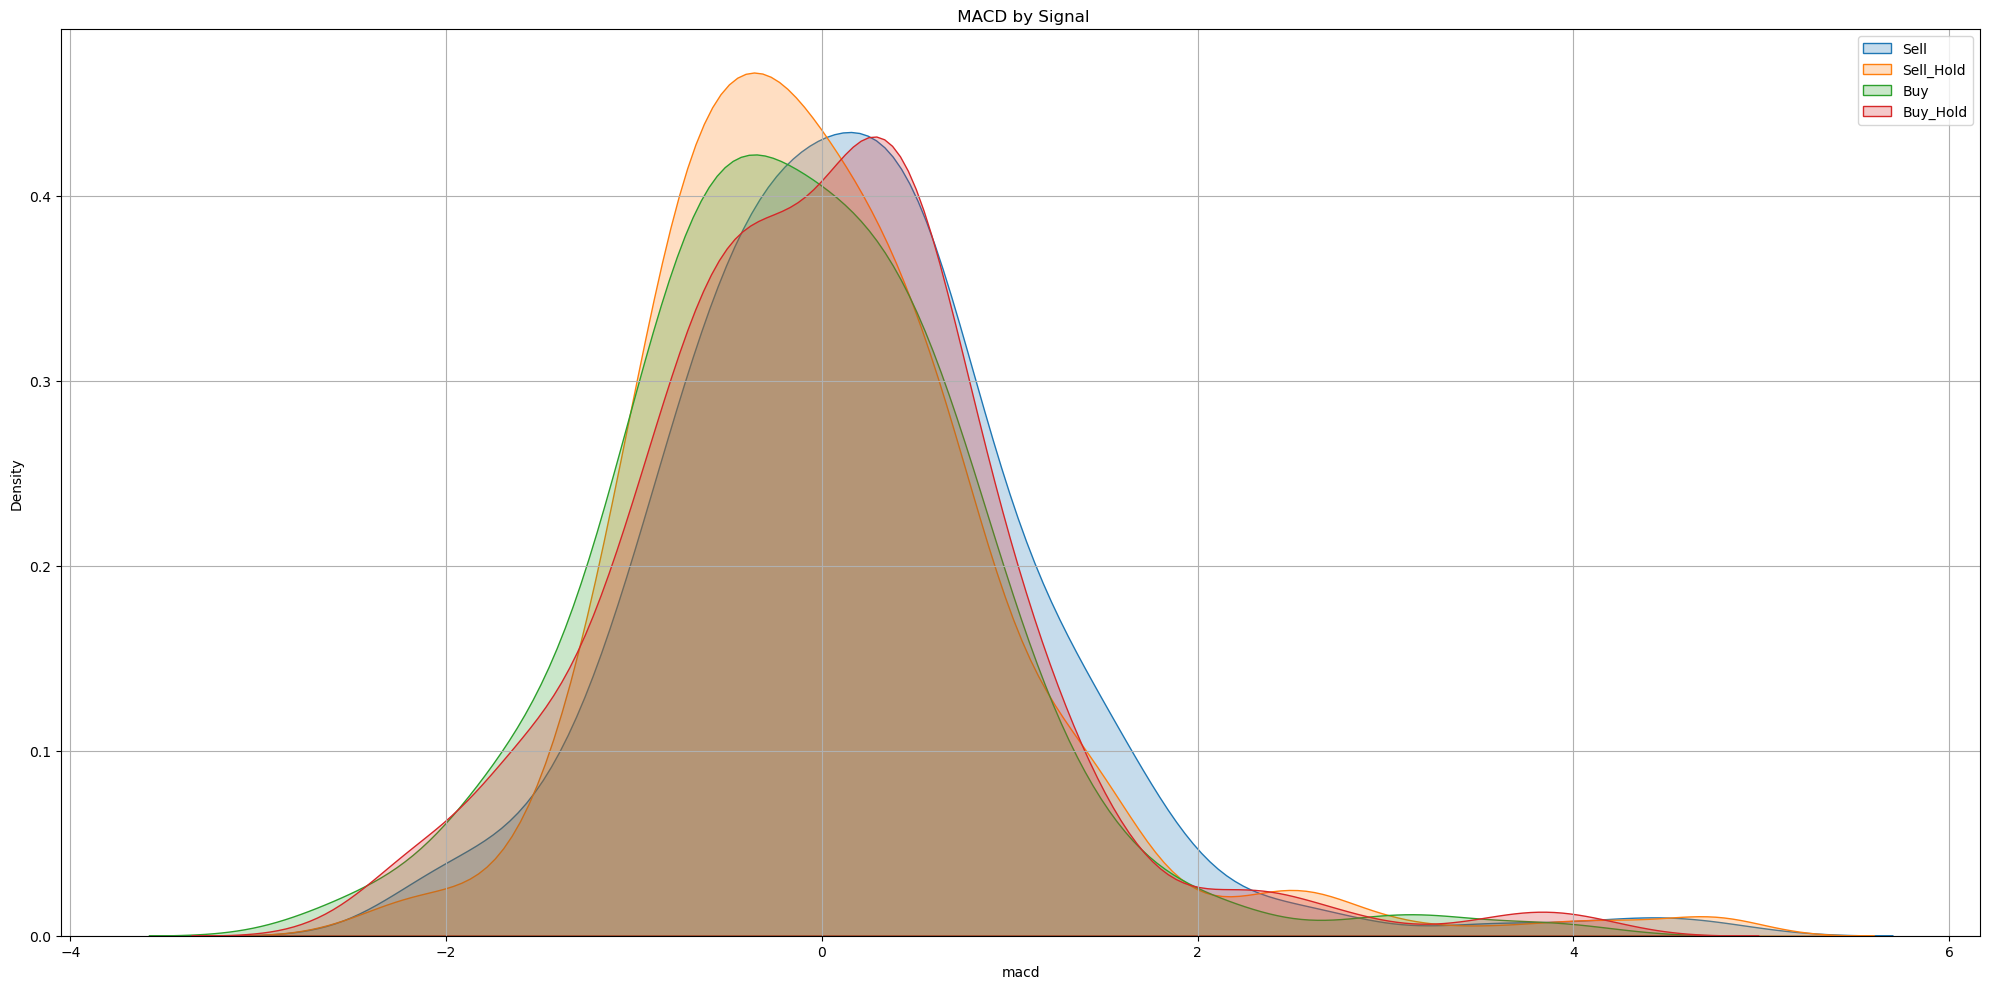

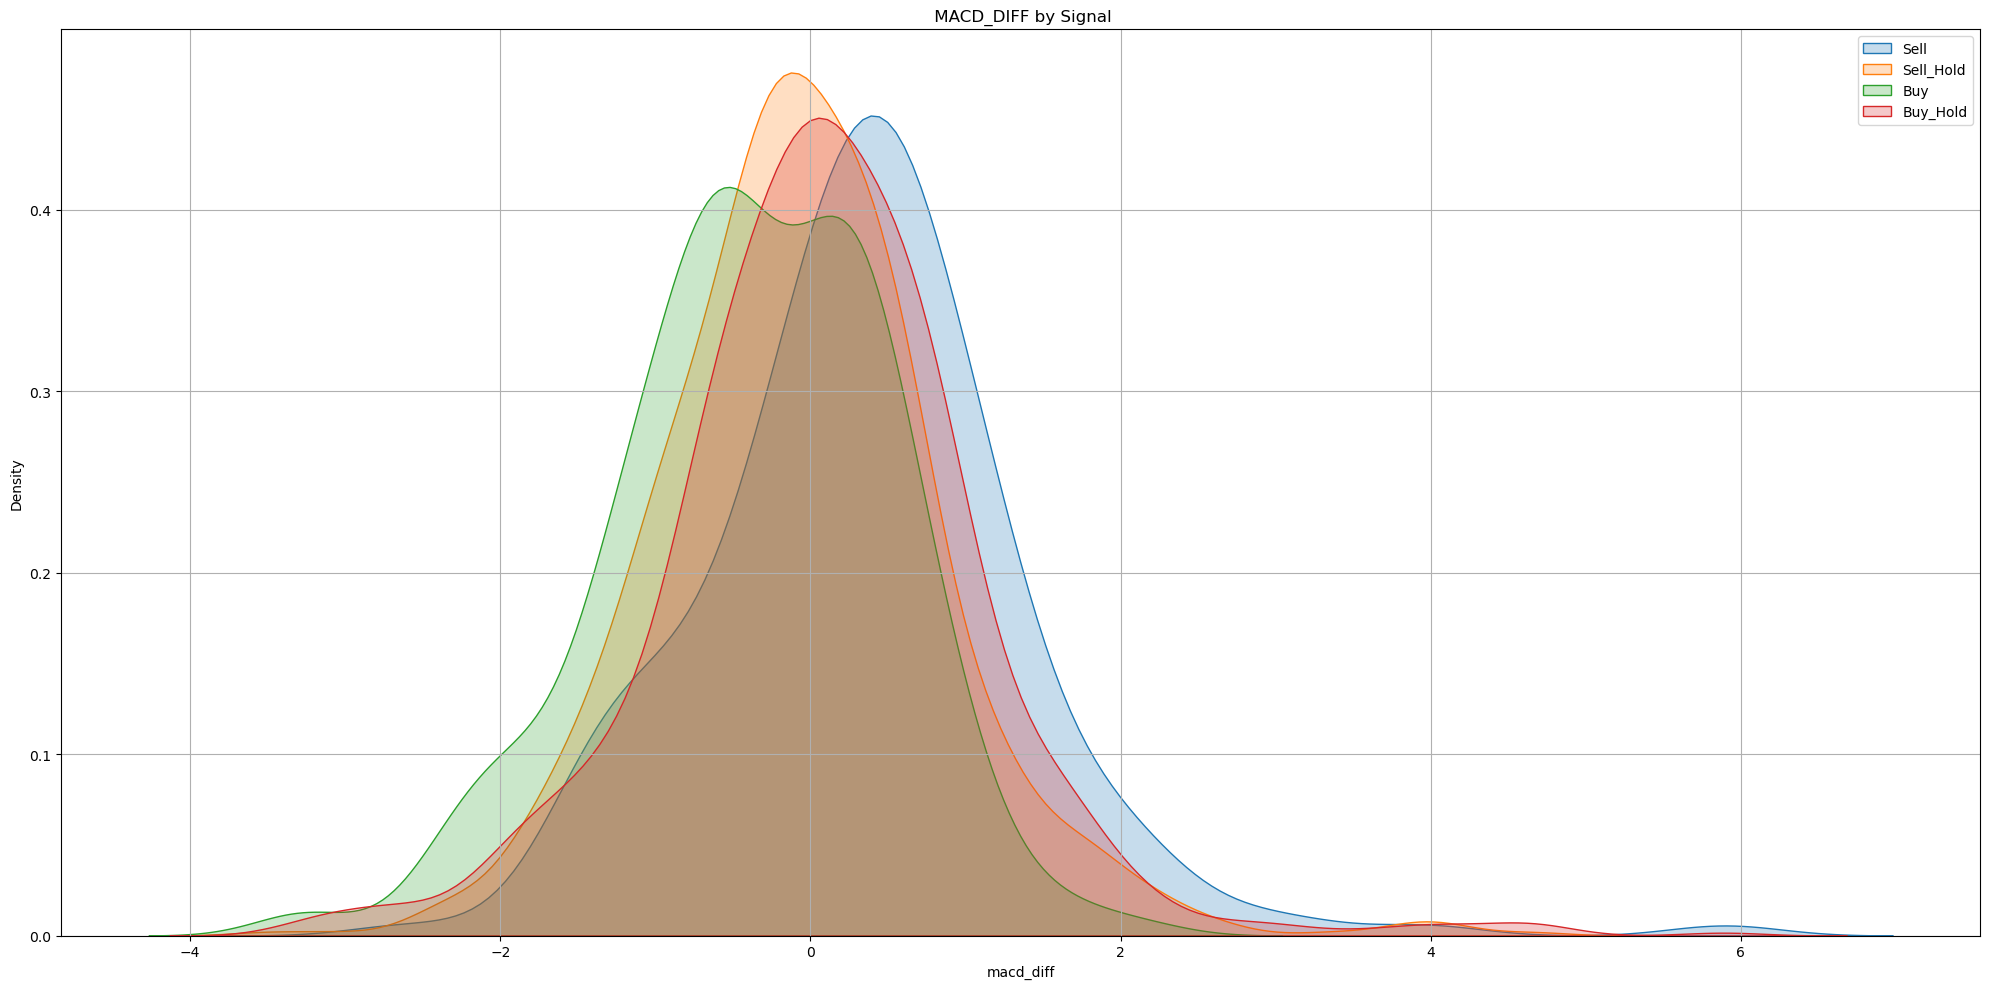

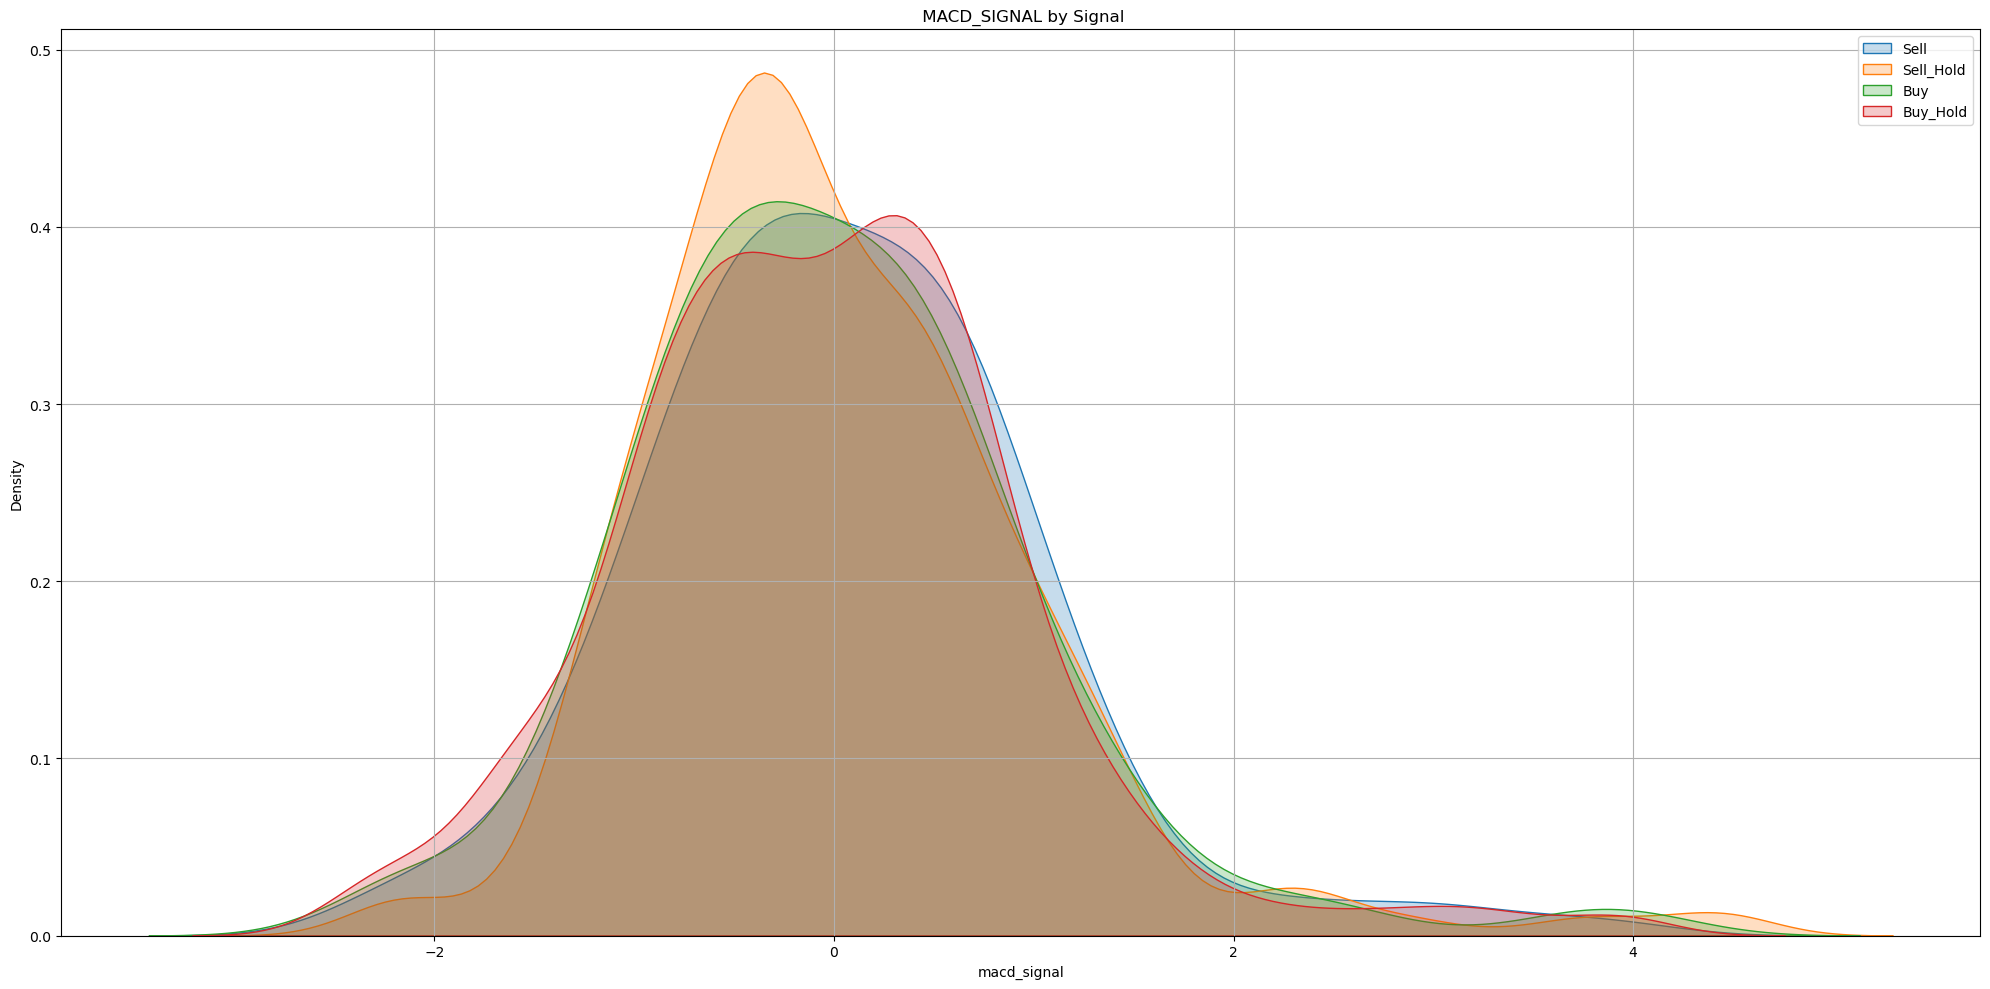

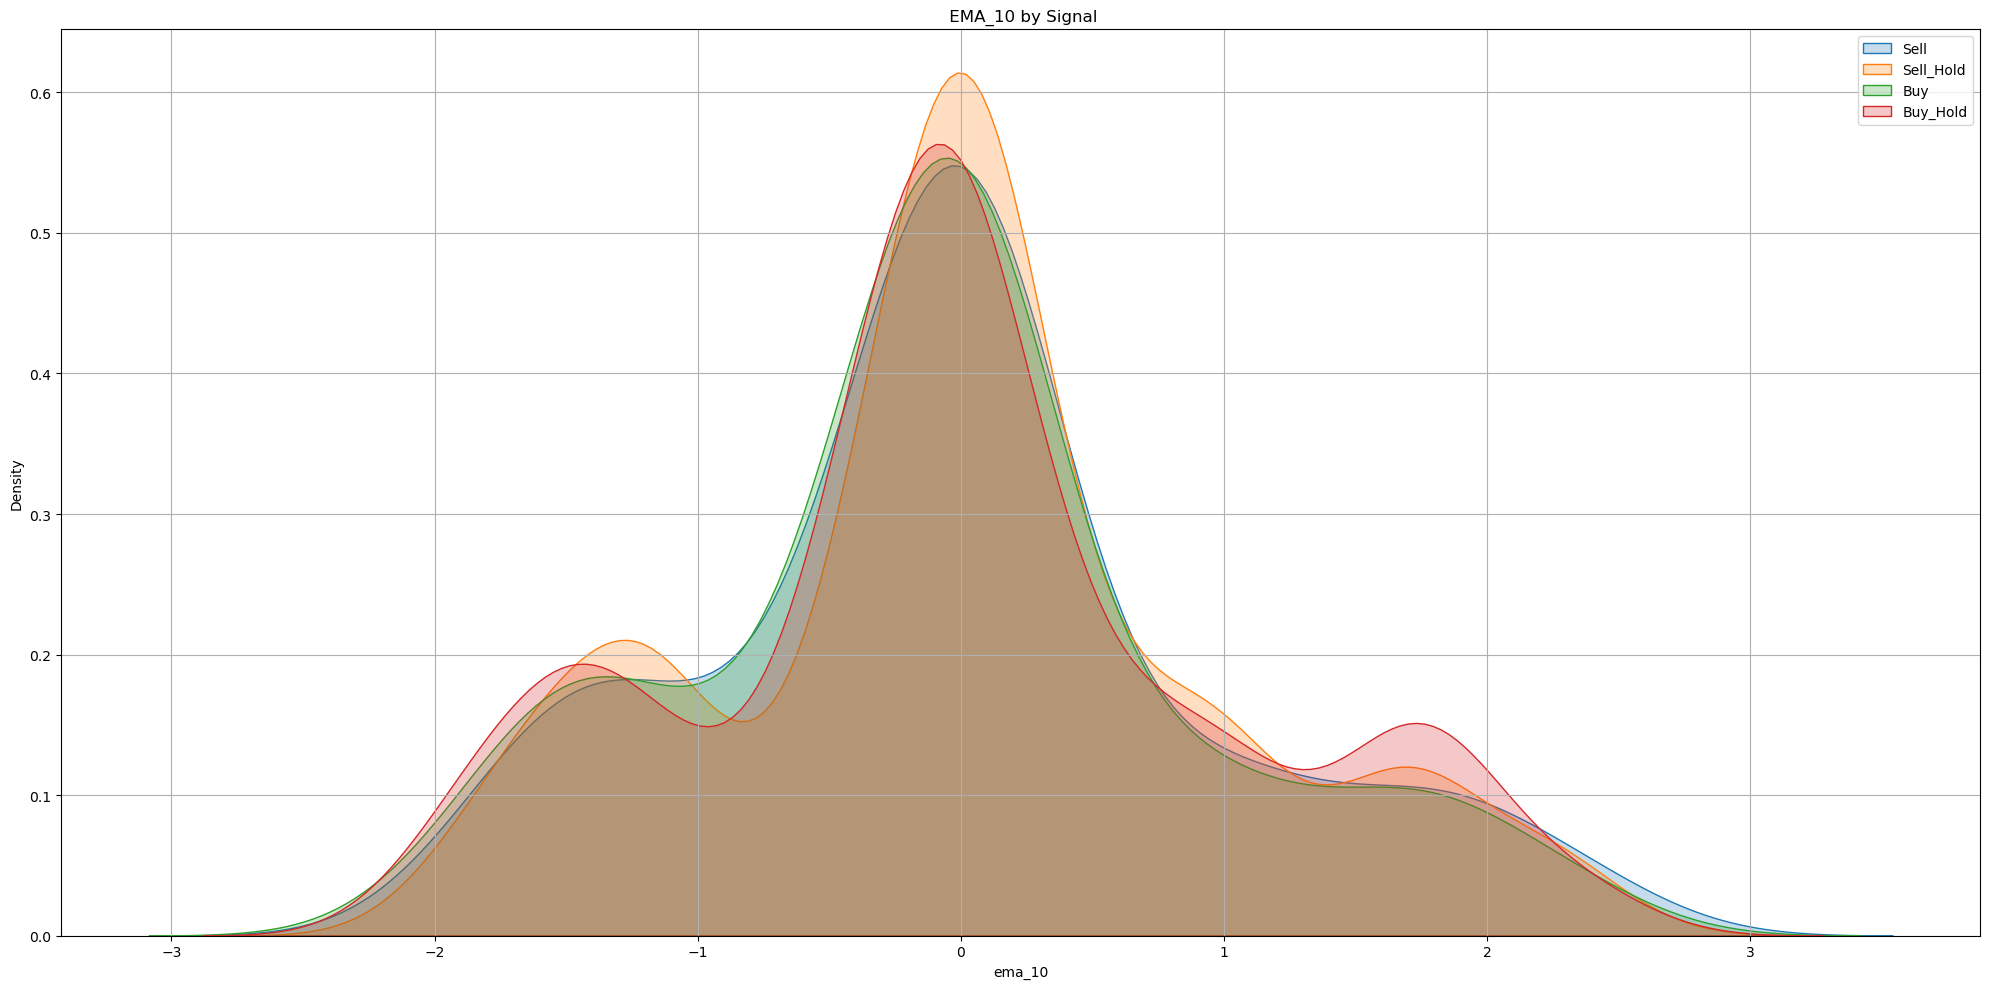

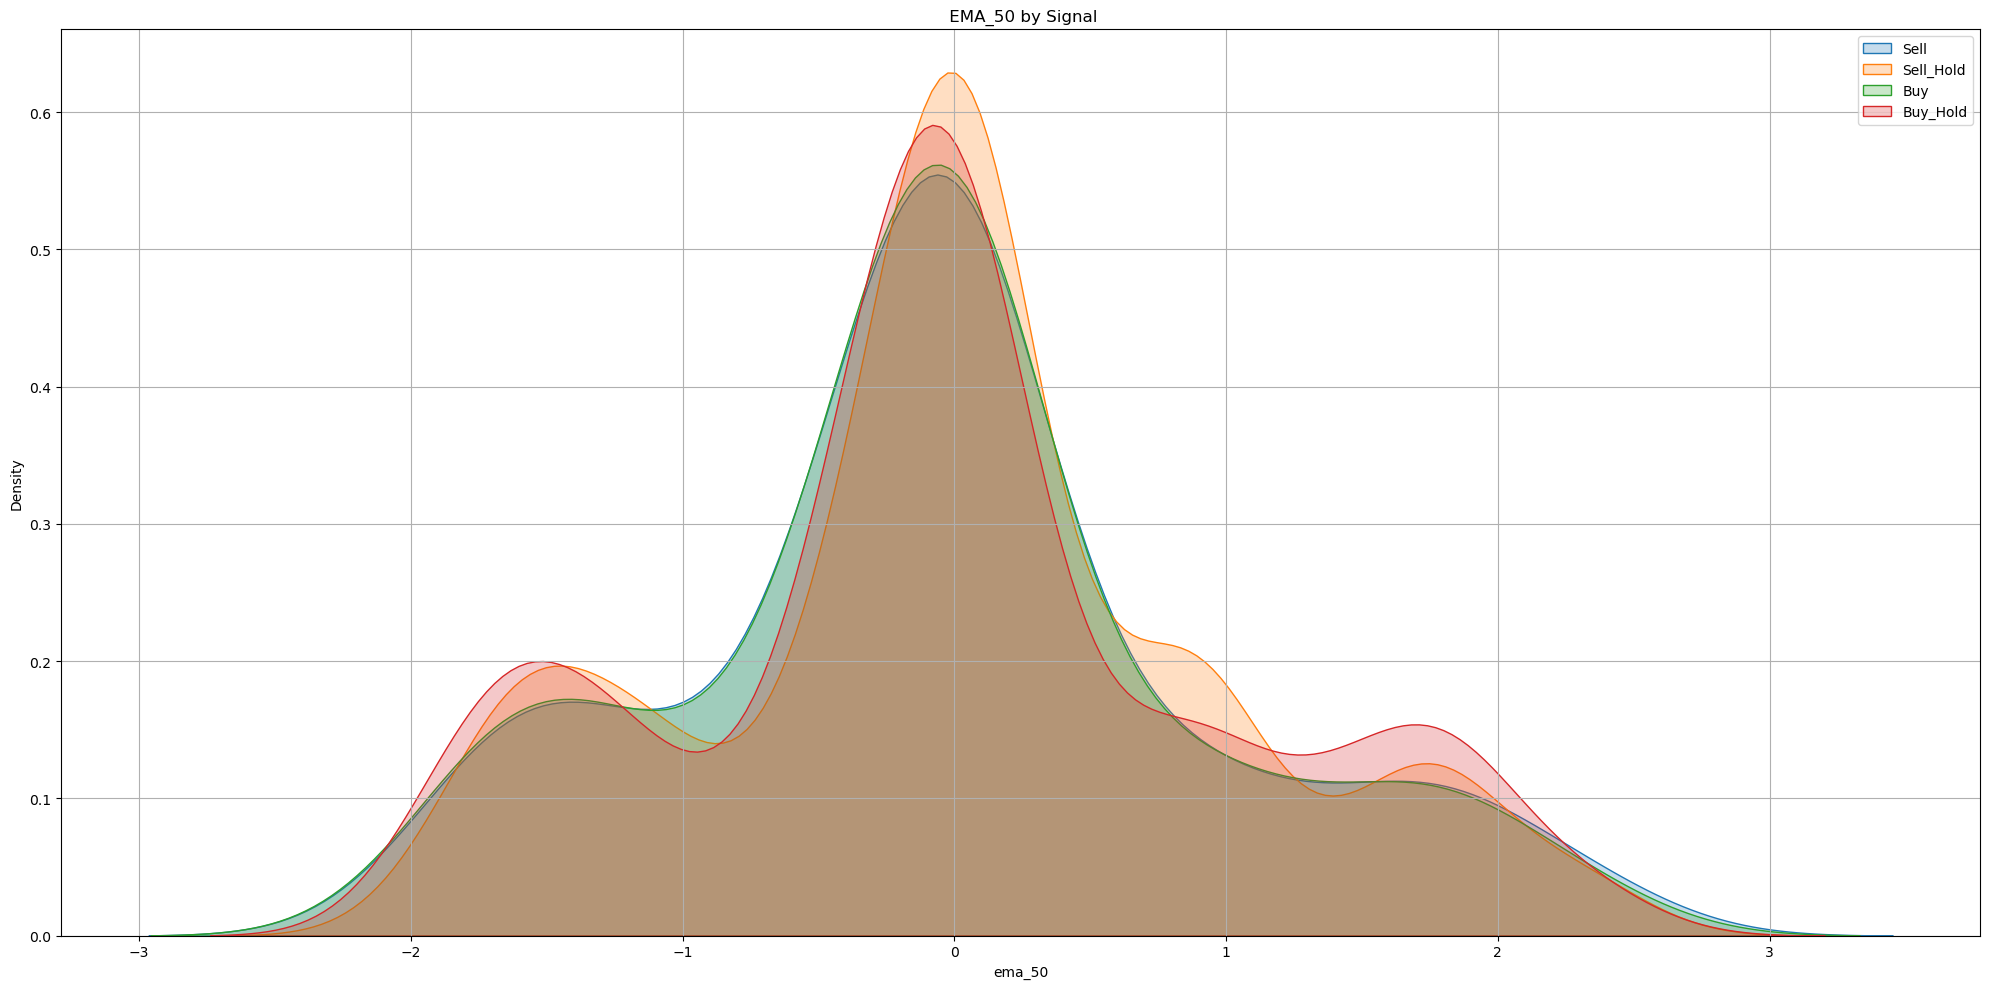

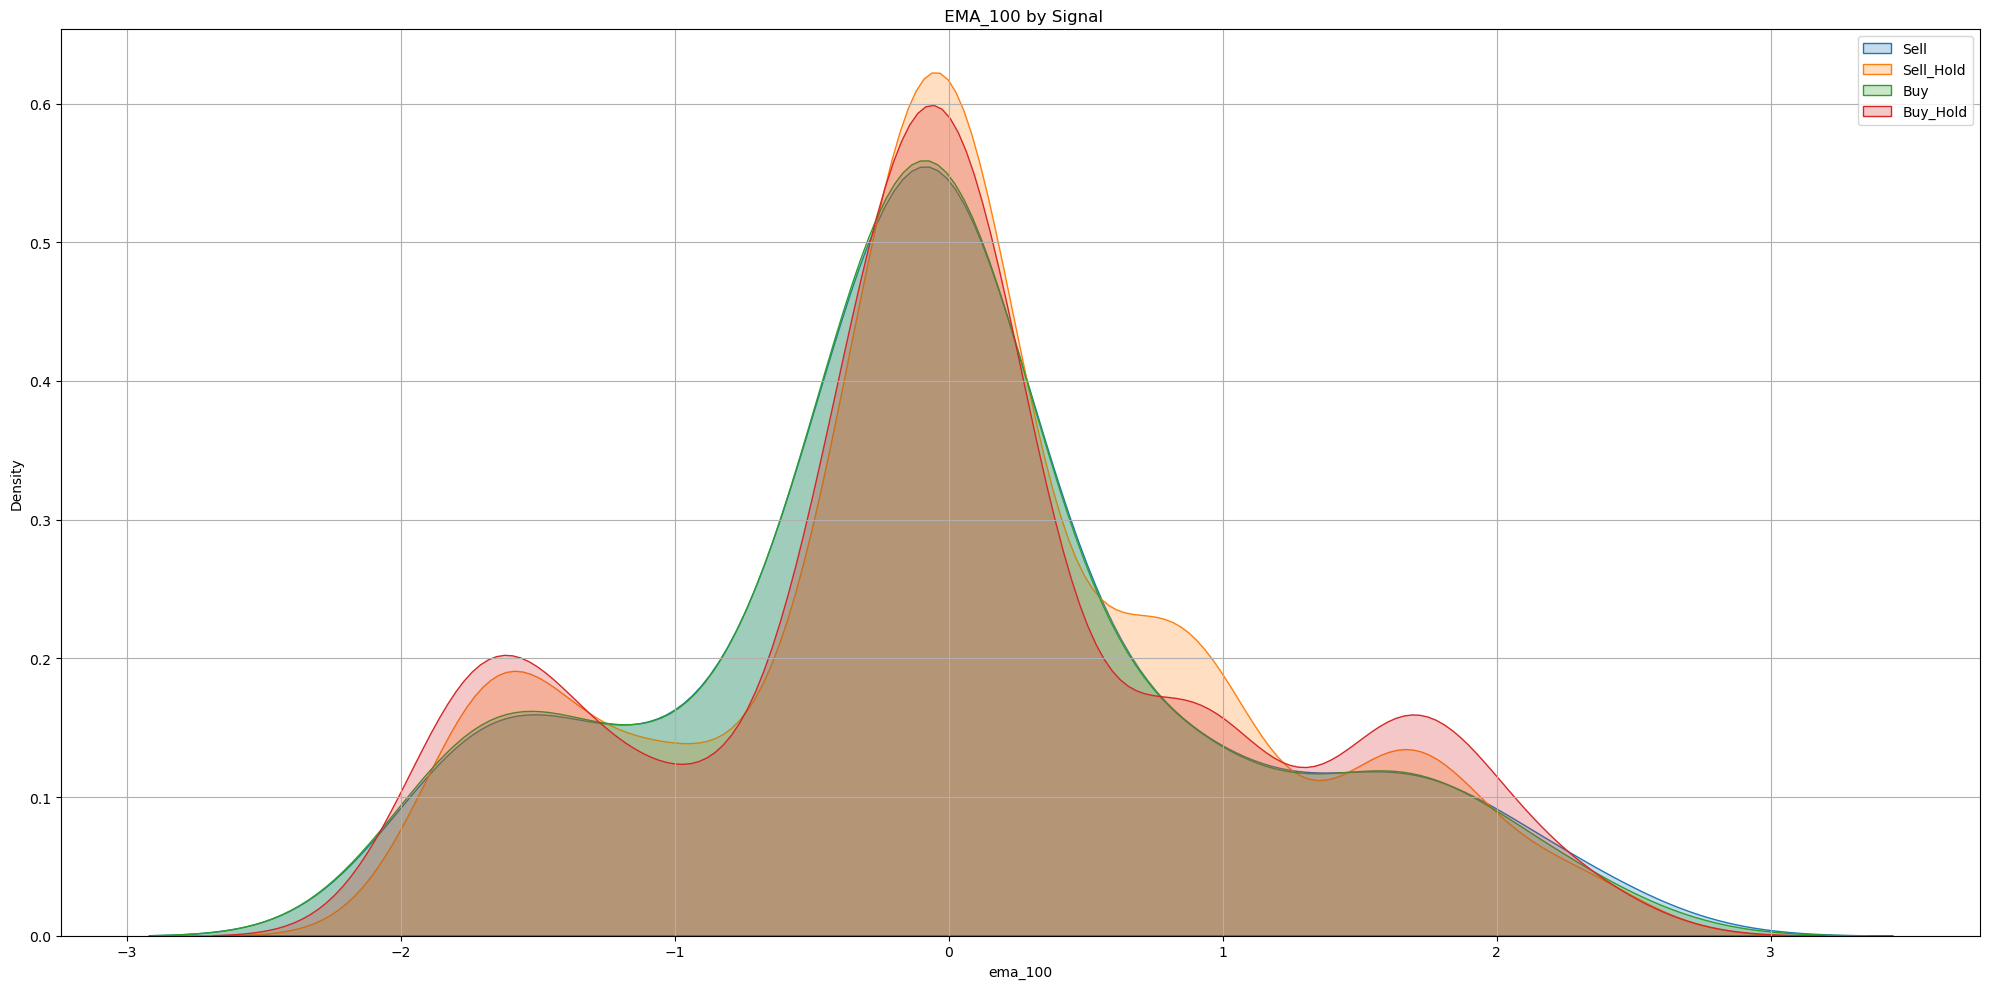

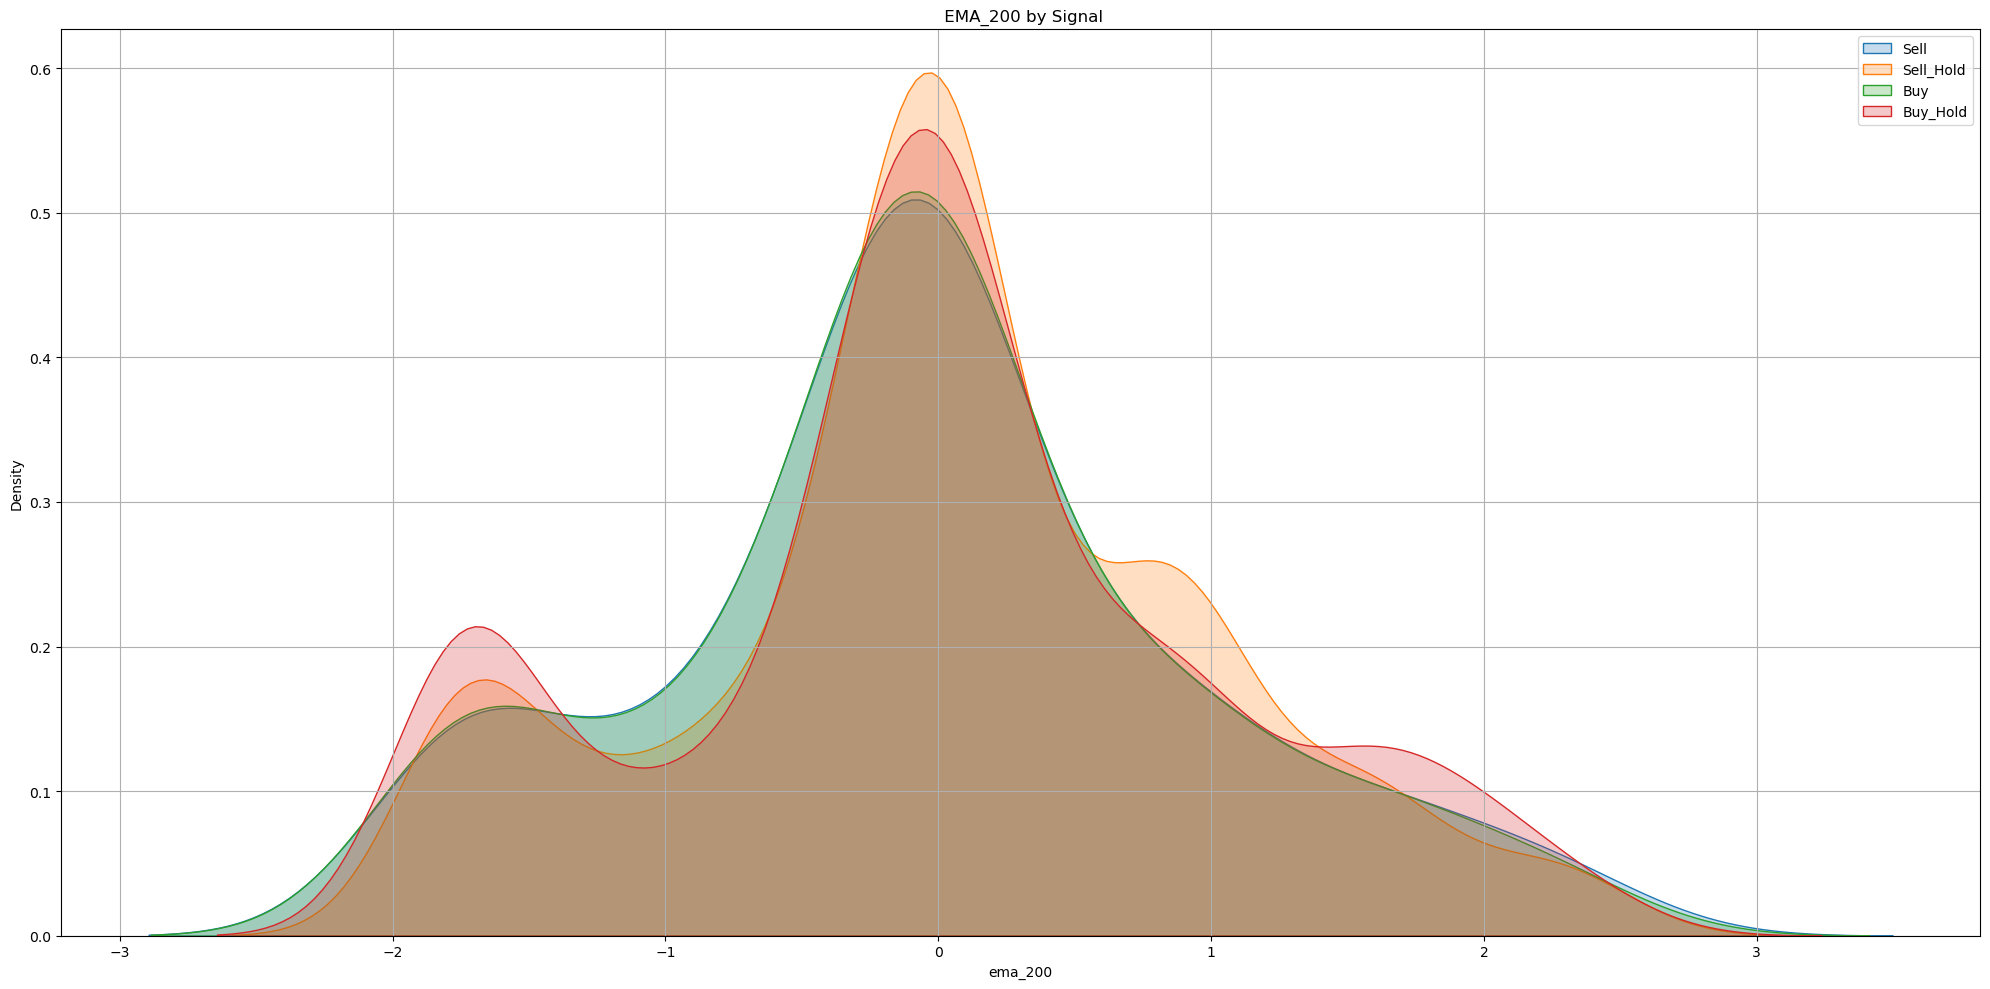

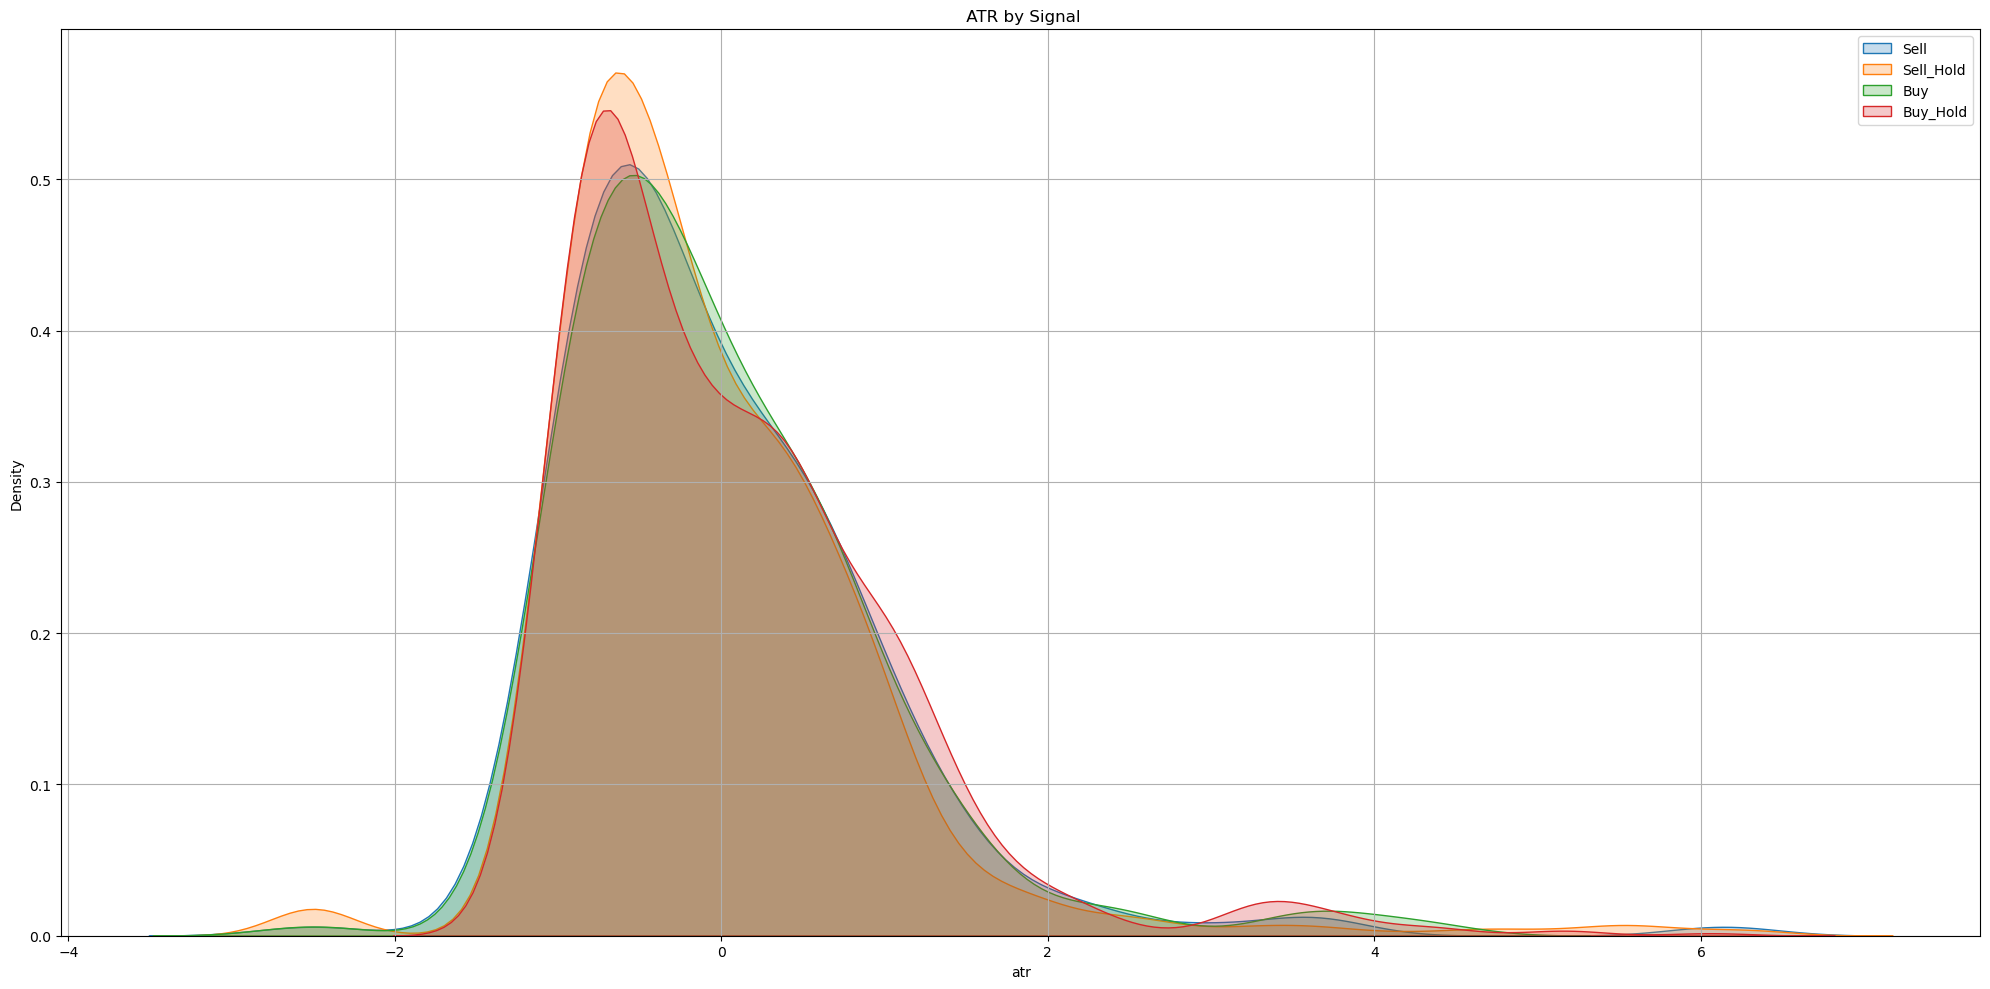

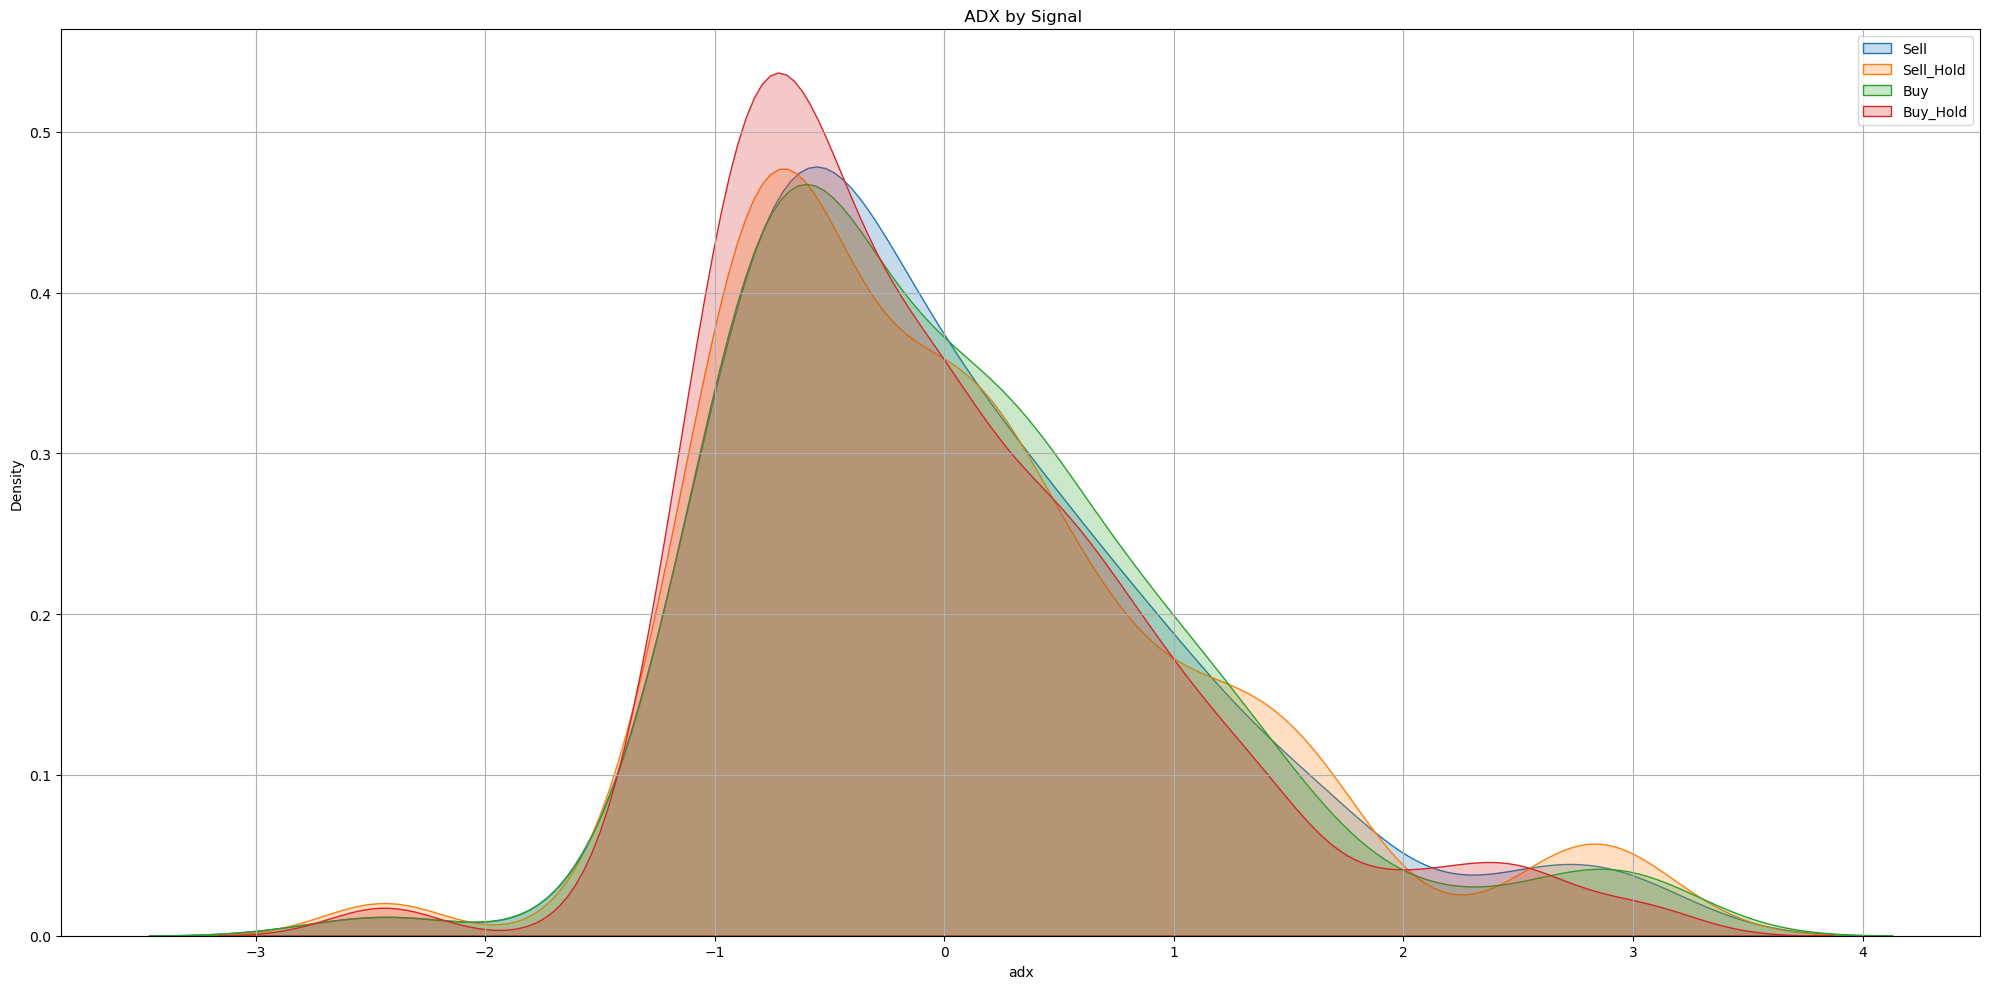

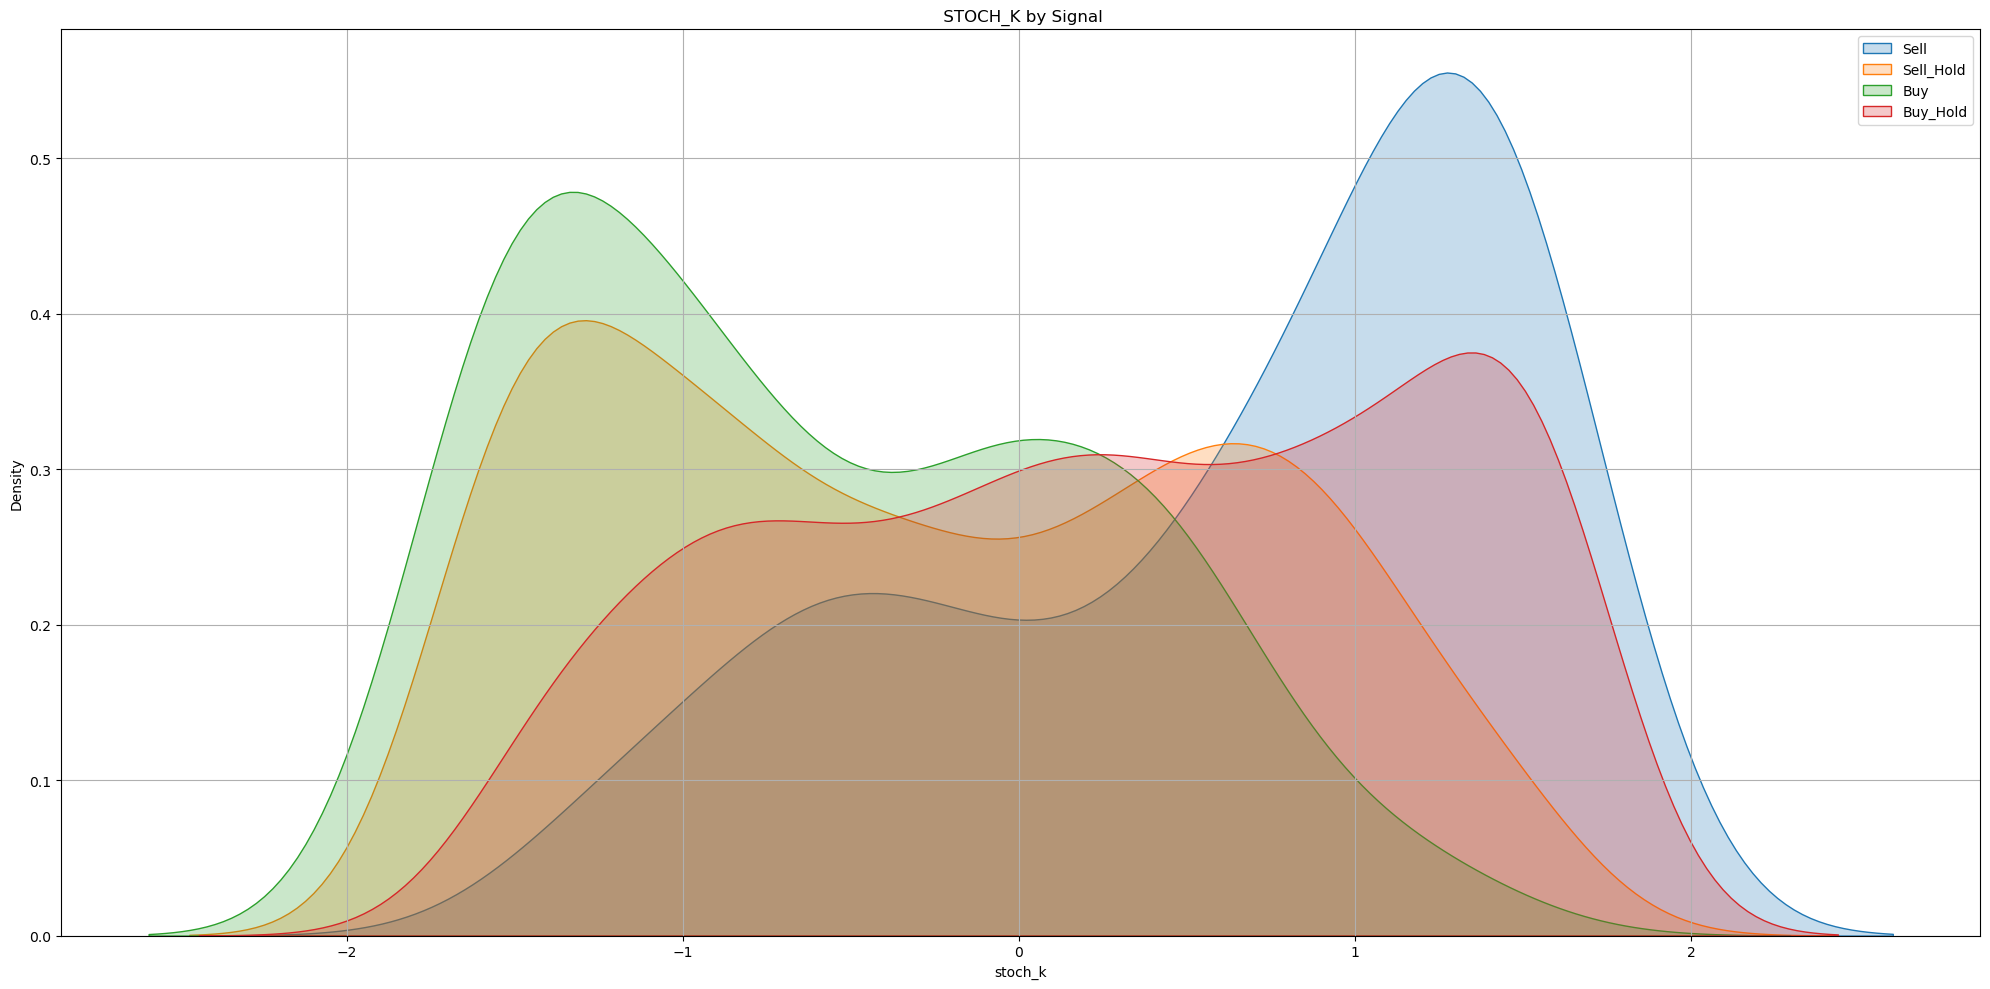

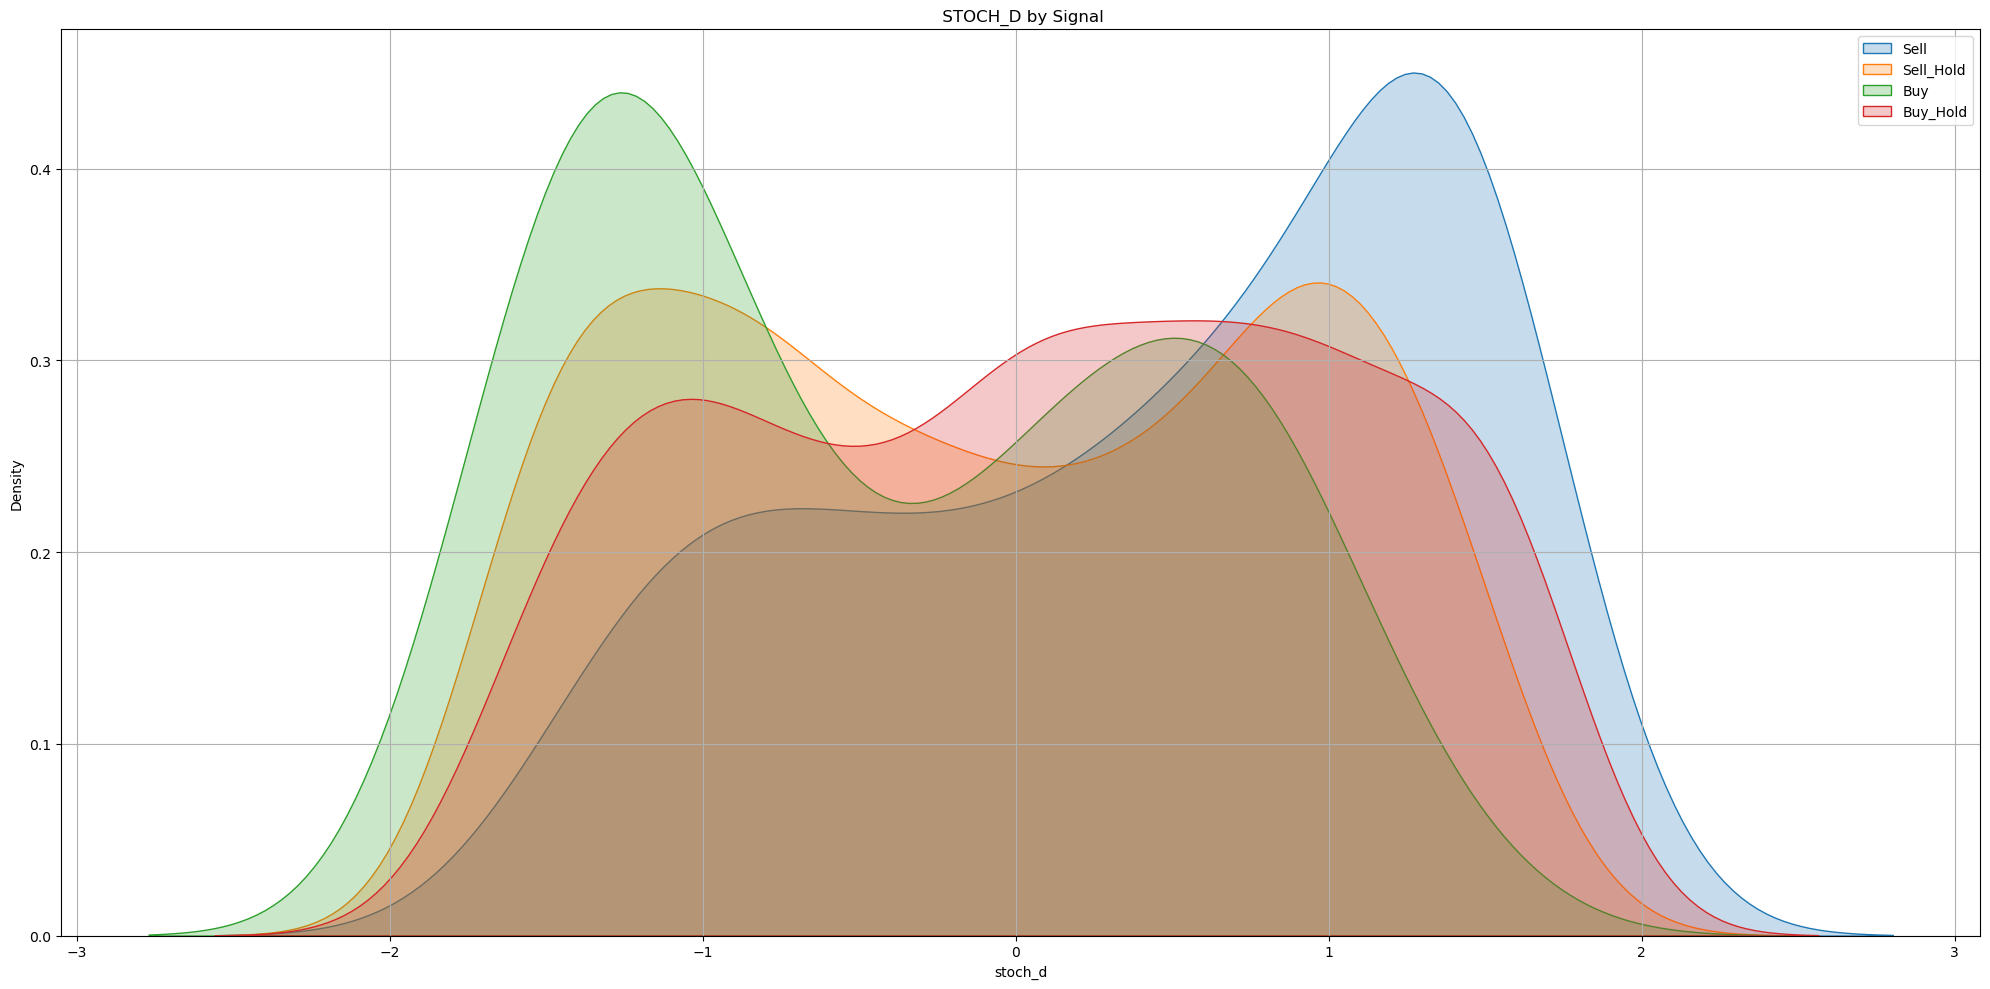

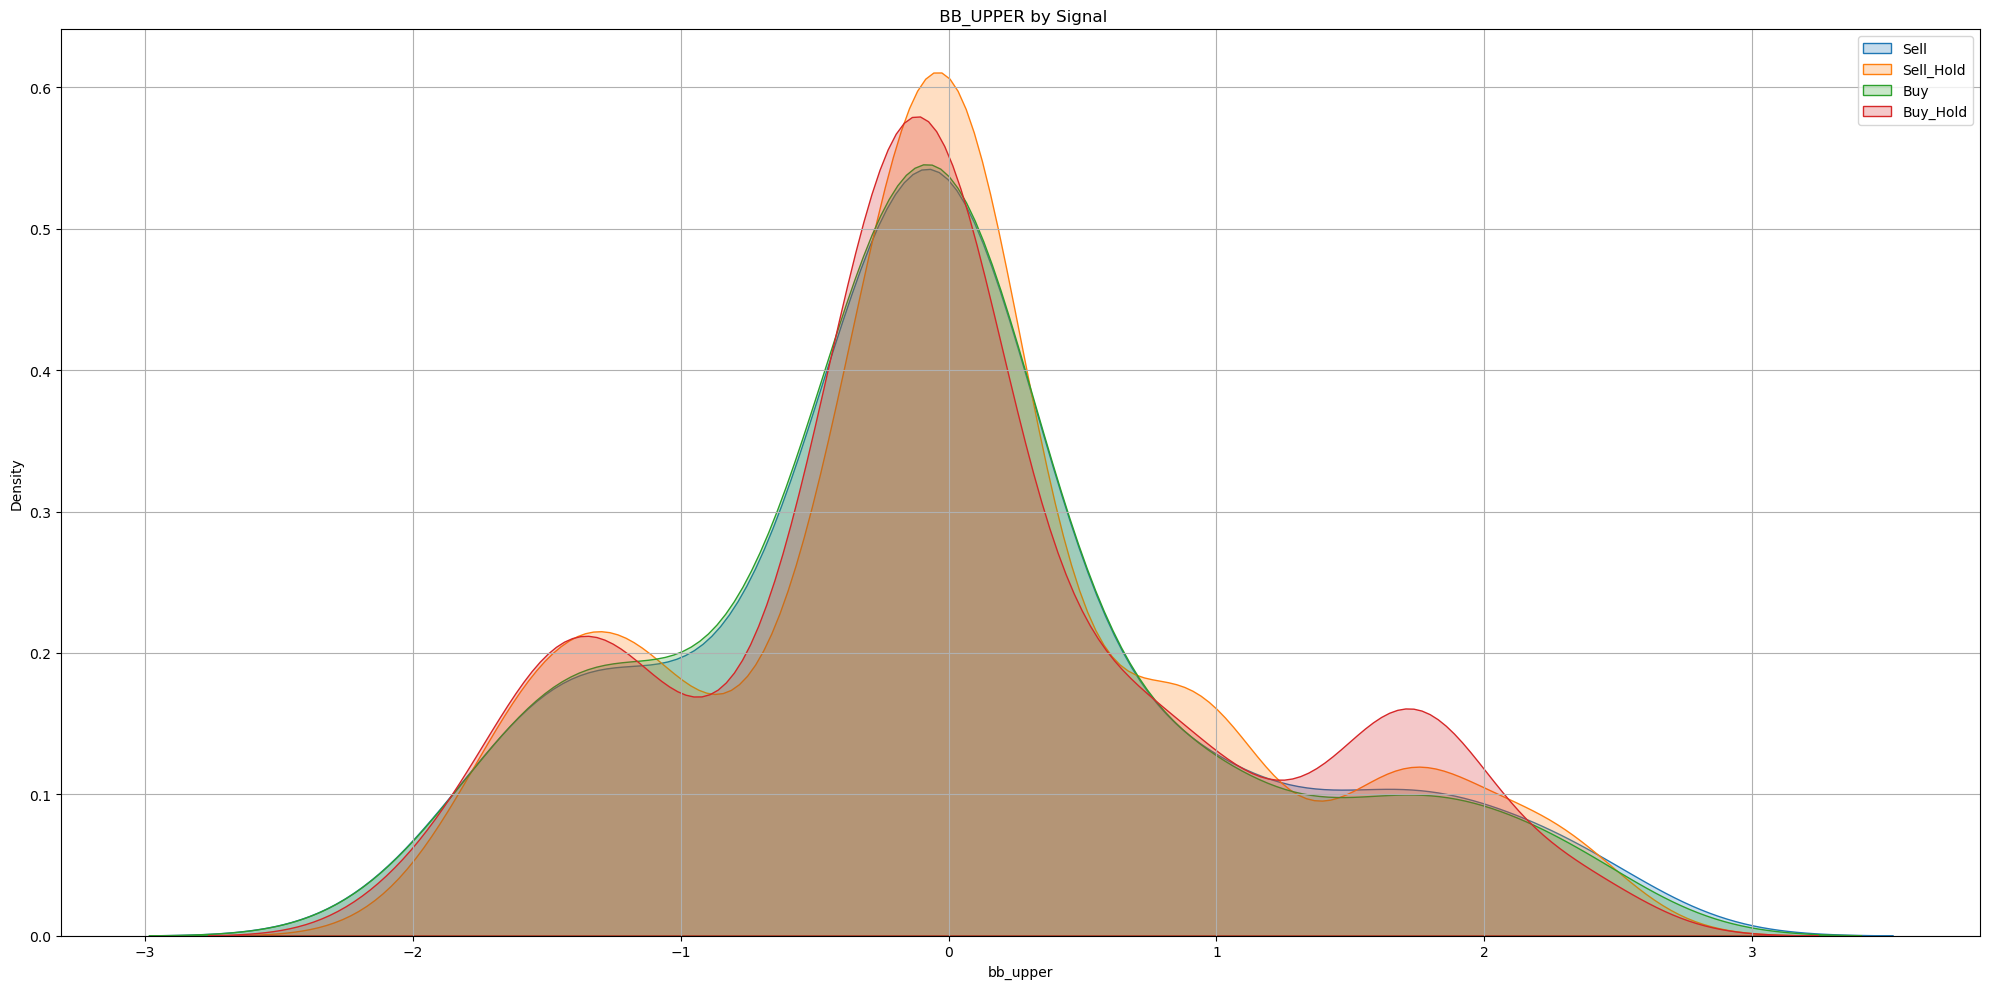

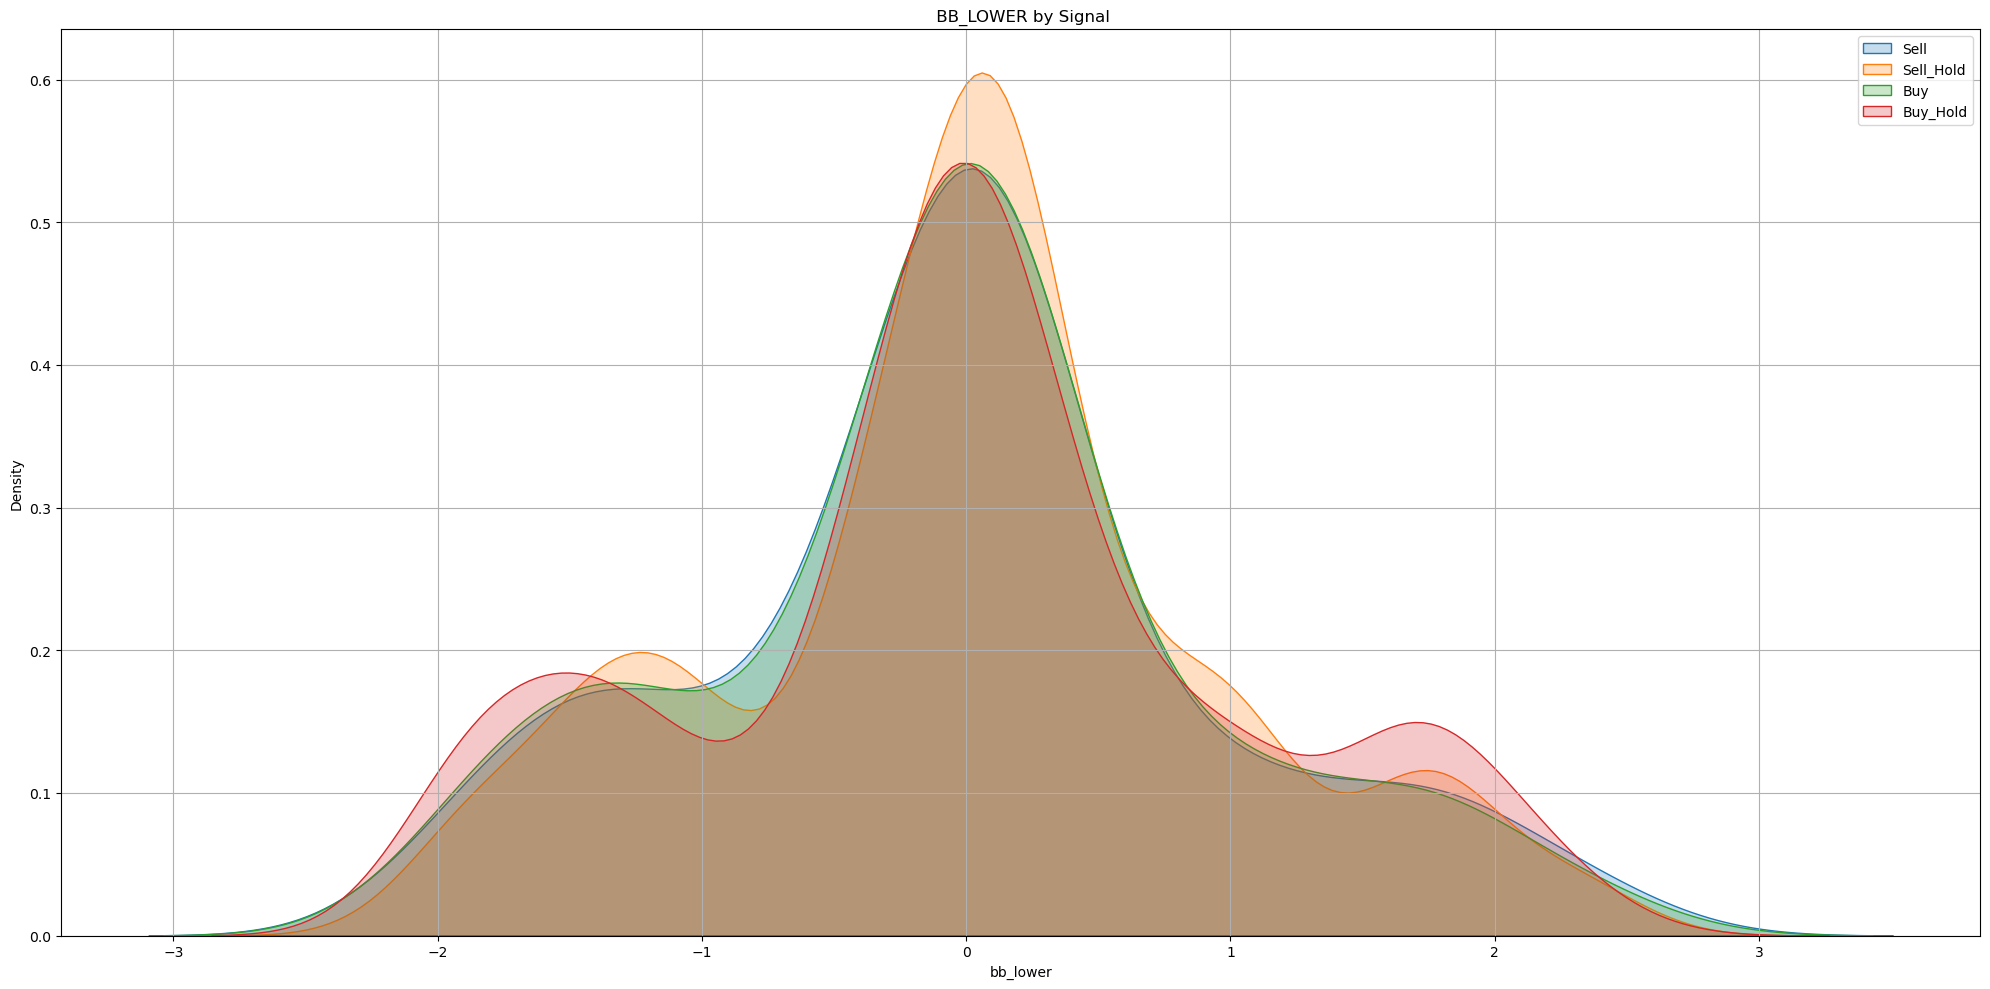

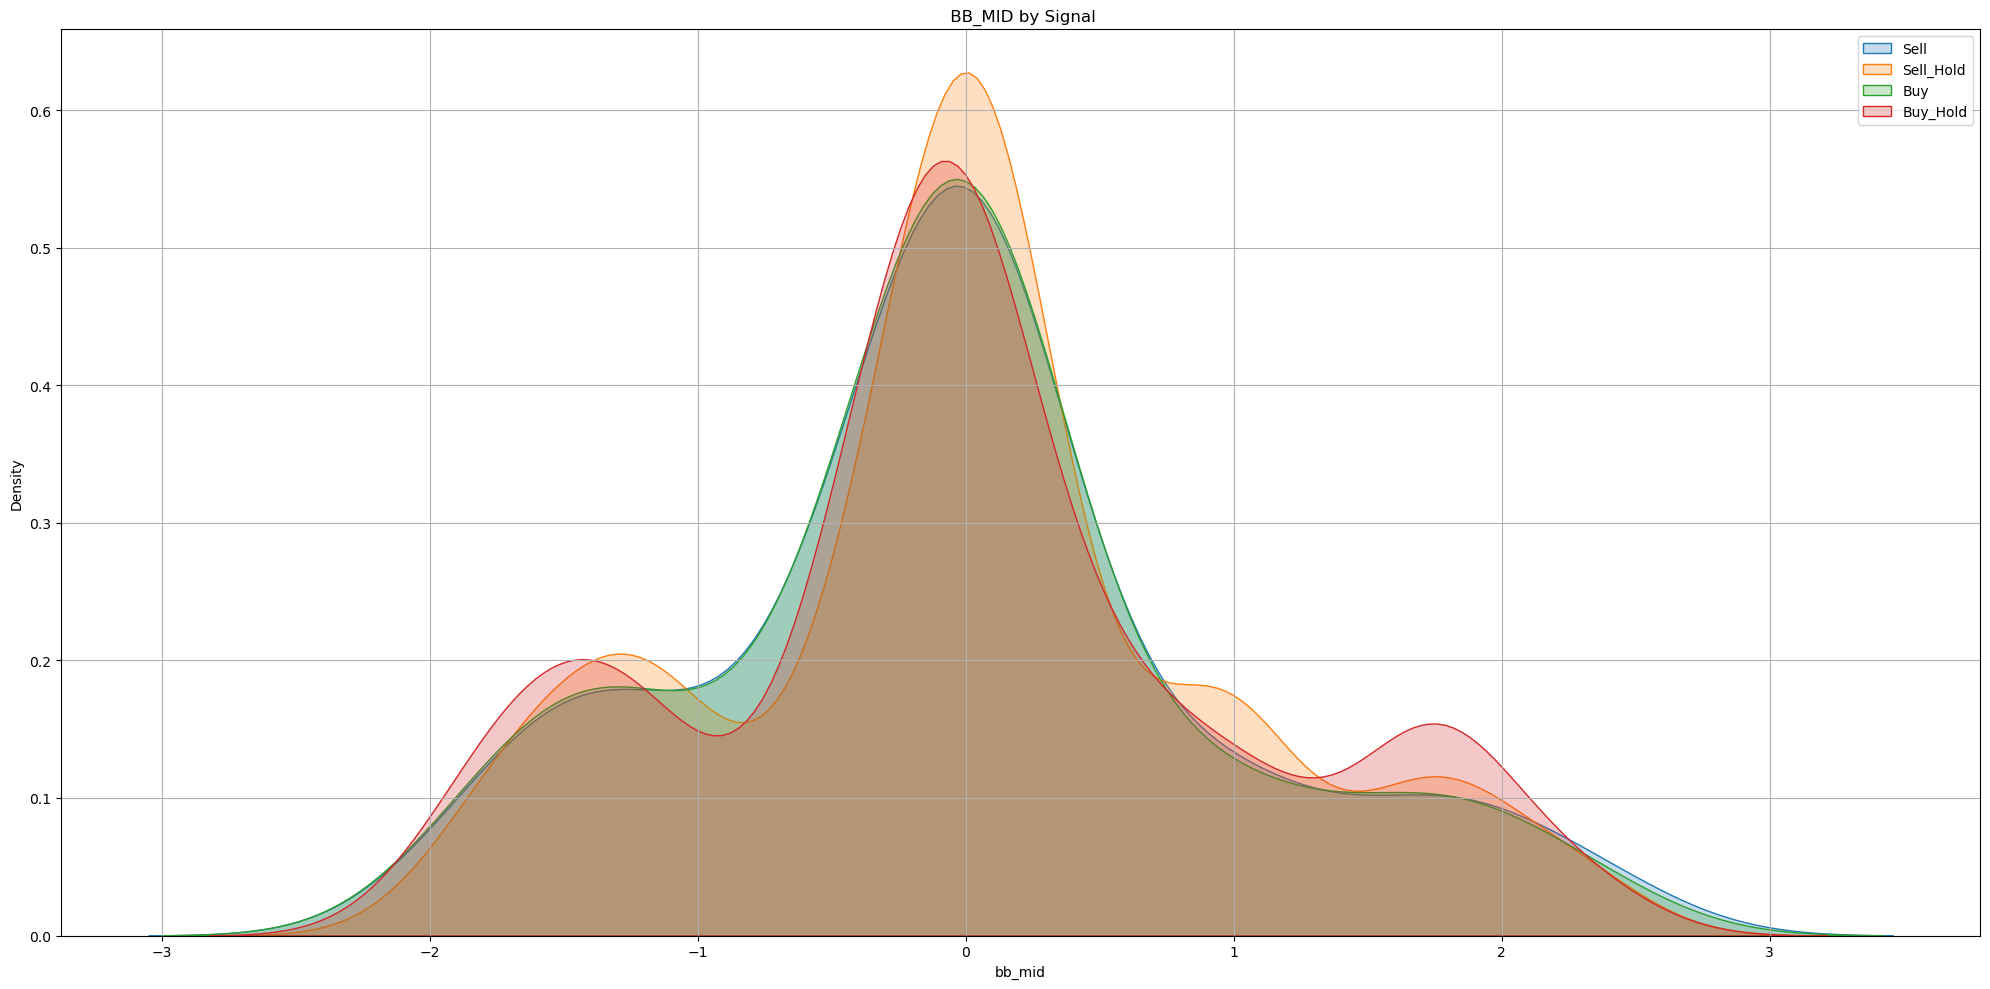

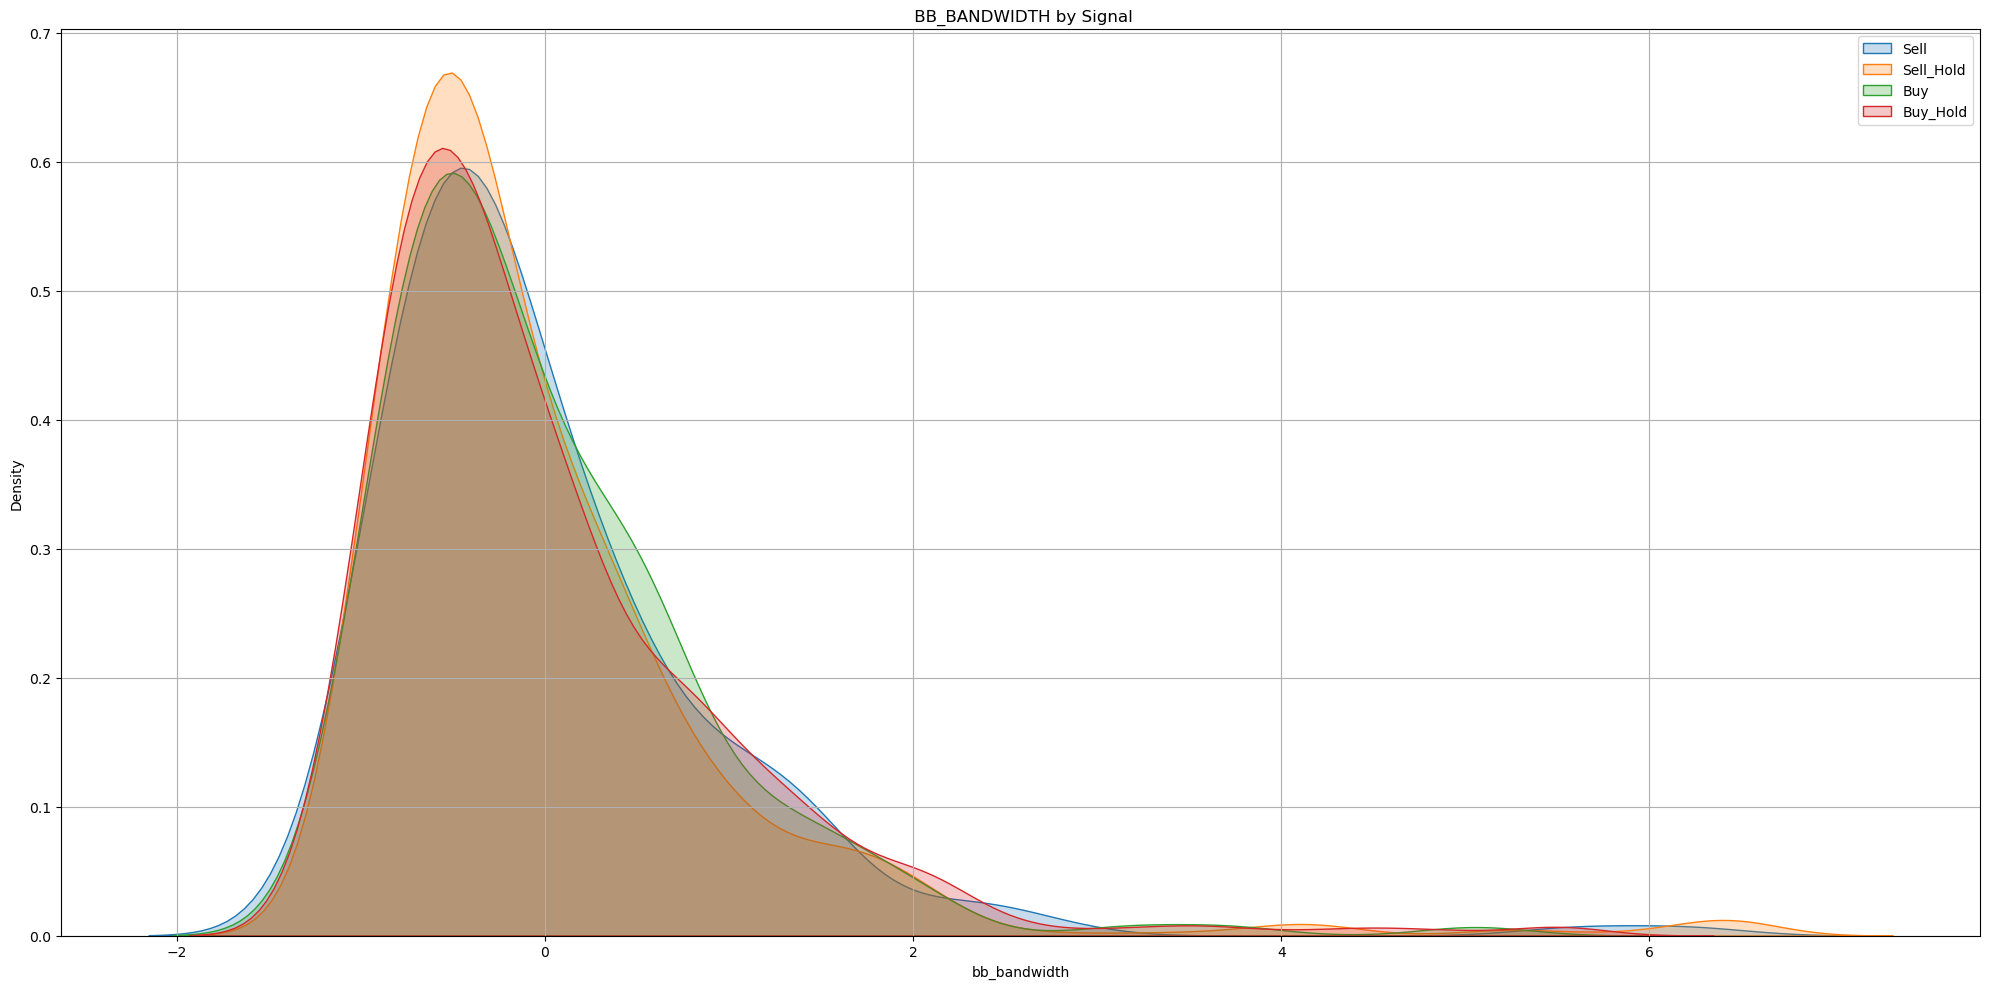

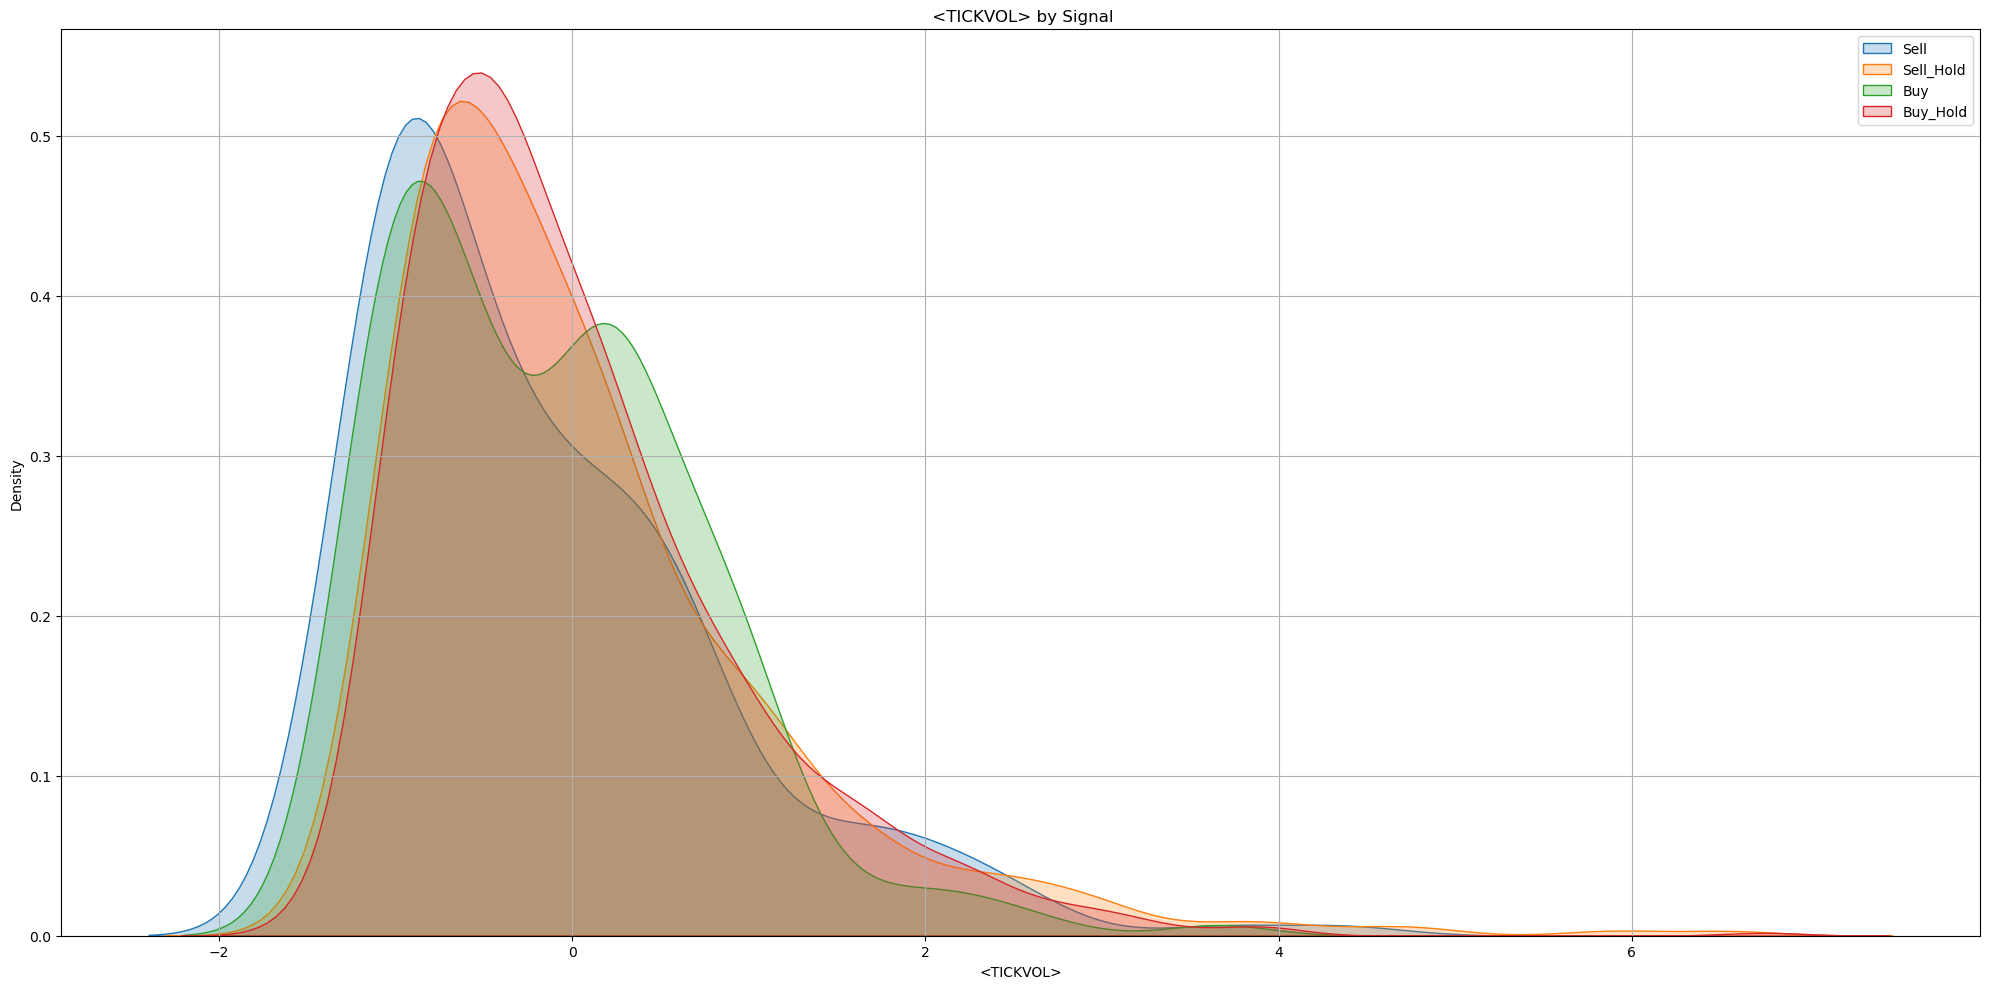

In [145]:
for indicator in indicators:
    plt.figure(figsize=(20, 10))
    for label in df_scaled["signal"].unique():
        if label != "Hold":
            sns.kdeplot(df_scaled[df_scaled["signal"] == label][indicator], label=label, fill=True, common_norm=False)
    plt.title(f" {indicator.upper()} by Signal")
    plt.xlabel(indicator)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

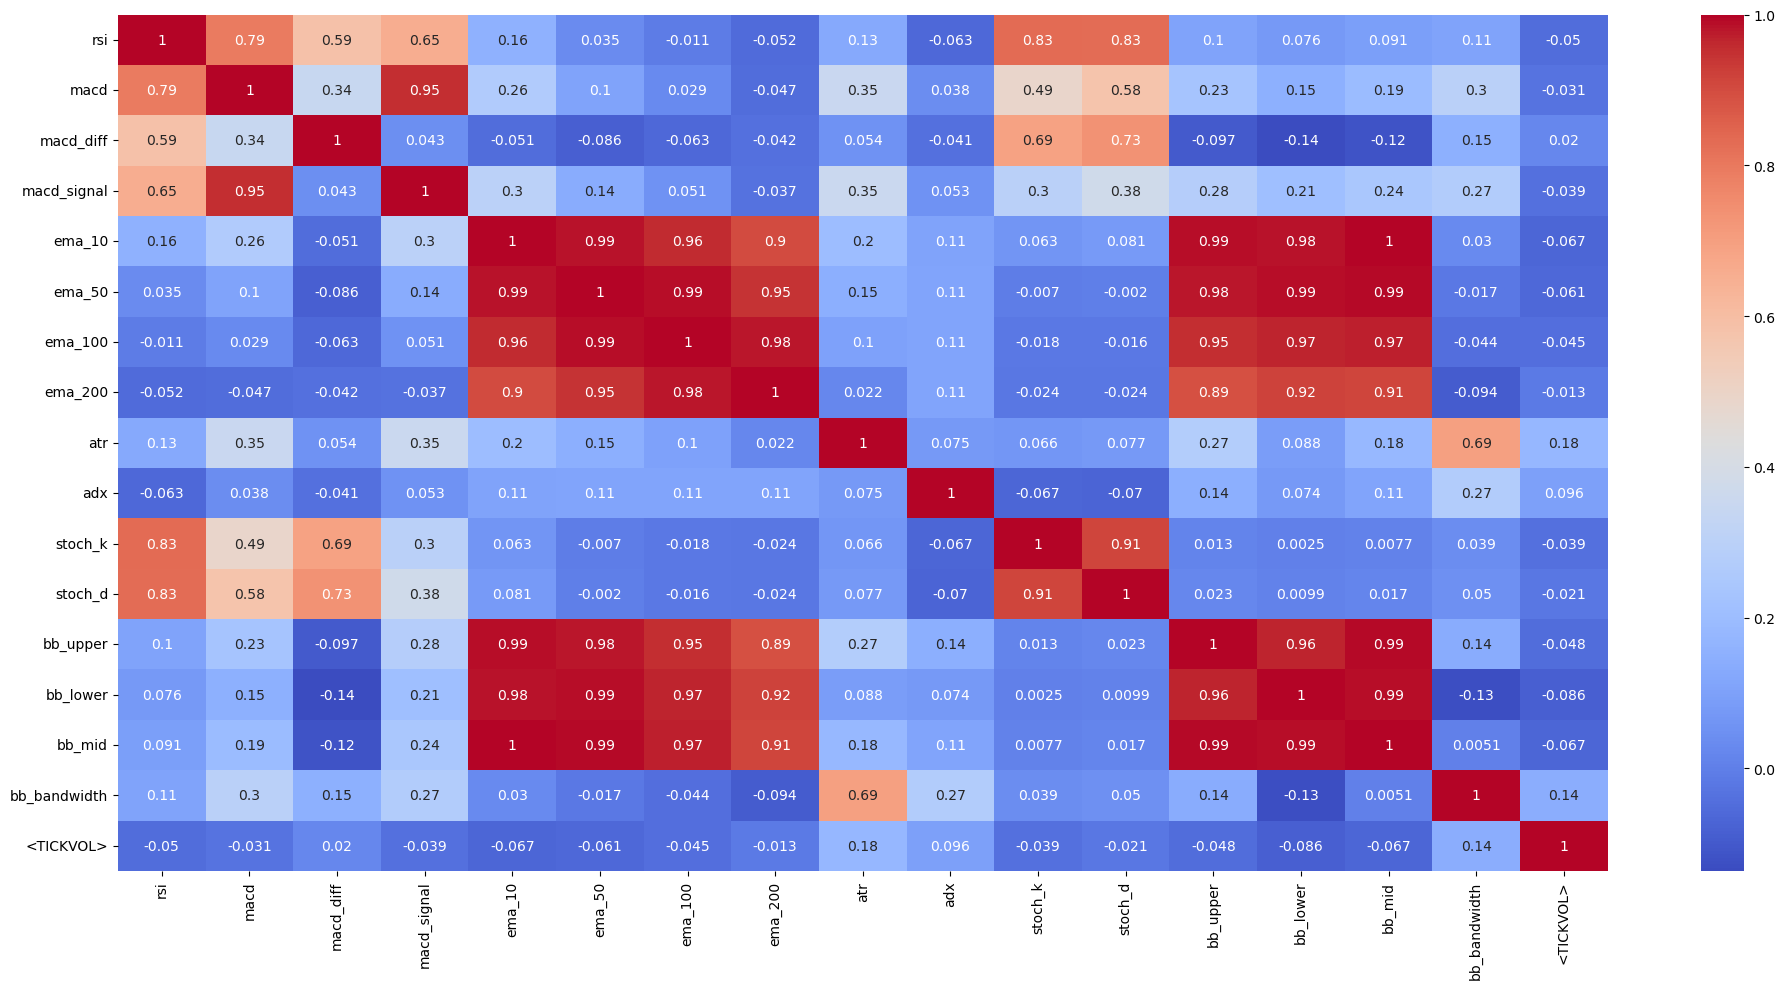

In [146]:
correlation = df[indicators].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.tight_layout()
plt.show()